# Aviation incidents in Canada : 80 years of Data  
## Introduction 
As stated by [ICAO](https://www.iata.org/en/youandiata/travelers/aviation-safety/), **safety** is the highest priority of all involved in aviation. The shared goal is for every flight to take-off and land safely, as happens more than 126,000 times every day. In 2018, the fatal accident rate was 0.28 per 1 million flights, the equivalent of one fatal accident for every 4.2 million flights.

Each fatality is a tragedy. And that rededicates everyone in the aviation industry to our common goal of having every flight take-off and land safely. 

The aviation industry is a complex collaboration of multiple fields. From manufacturers, to commercial airlines. The air traffic is regulated and managed by different agencies, and service providers.  

Data collection and analysis is a key factor in the safety management systems. It allows to investigate patterns and define efficient regulations and procedures.  

In **Canada**, aviation industry is regulated by [Transport Canada](https://tc.canada.ca/en). Air traffic services are offered by [Nav Canada](https://www.navcanada.ca/en/).  

Before diving into the data, let's define some terminology:
- **Occurrence**: Any event which is irregular, unplanned or non-routine in nature, including any aircraft accident, incident or other occurrence.
- **Accident**: An occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight until such time as all such persons have disembarked, in which:  
    1- a person is fatally or seriously injured  
    2- the aircraft sustains damage or structural failure  
    3- the aircraft is missing or is completely inaccessible.  

- **INCIDENT**: An occurrence, other than an accident, associated with the operation of an aircraft which affects or could affect the safety of operation.

- **SERIOUS INCIDENT**: An incident involving circumstances indicating that an accident nearly occurred.

## Purpose of this notebook  
In this notebook, we will analyse aviation occurrence data provided by [Transport Canada](https://www.bst-tsb.gc.ca/eng/stats/aviation/data-5.html). We will download the data, and after some cleaning and organizing, we will show plots of multiple aspect of these events.

In [1]:
# importing python libraries
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import numpy as np
# Setting plots parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Precisions about the datasets  
The data is divided into five (5) dataframes:  
- **Occurrence table**: This table contains data on the occurrence summary, including the date, time and location of the occurrence, the occurrence type and category, the occurrence classification, the aircraft involved, the number of injuries/or fatalities, the weather conditions, and data relating to the landing and takeoff aerodrome or operating surface.  
- **Aircraft table**: This table contains data on the occurrence aircraft, including its type, make, model, registration, and country of registration, aircraft’s engine(s), propellers, and rotors, data relating to any explosion, fire, fumes and/or smoke, operator information including type of operator, type of flight plan, flight number, departure and destination, and air traffic service involvement.  
- **Injuries table**: This table contains data on the number and severity of injuries resulting from the occurrence.  
- **Events and phases table**: This table contains data pertaining to the phases of the occurrence flight and the events during the flight.  
- **Survivability table**: This table contains data relating to the evacuation of the occurrence aircraft, the effectiveness of survival devices, and the systems for locating the occurrence aircraft.  

All these tables are available as `csv` files. `data_dictionary` table contains the definitions for each column in the dataframes.


## Downloading the data  
We use `urllib` library in order to download the `csv` files. We start by definig the different urls used in this project:

In [2]:
ref_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/data-5.html'
data_dictionary_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/csv/ASISdb-dd.csv'
occurence_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv'
aircraft_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv'
injuries_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_INJURIES_PUBLIC.csv'
events_phases_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv'
survivability_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_SURVIVABILITY_PUBLIC.csv'

Now we download the datasets. The `if` blocs will test first if the files are already avaliable, before initiating the download.

In [3]:
if 'data_dict.csv' not in os.listdir():
    urllib.request.urlretrieve(data_dictionary_url, 'data_dict.csv')
if 'occurence.csv' not in os.listdir():
    urllib.request.urlretrieve(occurence_table_url, 'occurence.csv')
if 'aircraft.csv' not in os.listdir():
    urllib.request.urlretrieve(aircraft_table_url, 'aircraft.csv')
if 'injuries.csv' not in os.listdir():
    urllib.request.urlretrieve(injuries_table_url, 'injuries.csv')
if 'events_phases.csv' not in os.listdir():
    urllib.request.urlretrieve(events_phases_table_url, 'events_phases.csv')
if 'survivability.csv' not in os.listdir():
    urllib.request.urlretrieve(survivability_table_url, 'survivability.csv')


The library **Pandas** is used in order to read the `csv` files.

In [4]:
import warnings
warnings.filterwarnings("ignore")
data_dict_df = pd.read_csv('data_dict.csv',encoding = 'ISO-8859-1')
occurence_df = pd.read_csv('occurence.csv',encoding = 'ISO-8859-1')
aircraft_df = pd.read_csv('aircraft.csv',encoding = 'ISO-8859-1')
injuries_df = pd.read_csv('injuries.csv', encoding='ISO-8859-1')
events_phases_df = pd.read_csv('events_phases.csv', encoding='ISO-8859-1')
survivability_df = pd.read_csv('survivability.csv', encoding='ISO-8859-1')

Let's take a first look at the datasets:

In [5]:
print('Total number of columns \n',data_dict_df['Column name'].describe())
print('\nNumber of aviation occurrences \n',occurence_df['OccNo'].describe())

Total number of columns 
 count       514
unique      497
top       OccID
freq          5
Name: Column name, dtype: object

Number of aviation occurrences 
 count        48799
unique       45244
top       A96A0050
freq            12
Name: OccNo, dtype: object


There are around 500 different columns, to describe more than 45000 events. After looking into the files, I've decided to keep the following columns for this study :

In [6]:
occurence_sel_columns = ['OccNo', 'AirportID_CountryID_DisplayEng', 'AirportID_ProvinceID_DisplayEng', 'Location', 'Latitude', 'Longitude', 'ICAO','CountryID_DisplayEng',
'ICAO_DisplayEng', 'OccDate', 'OccIncidentTypeID_DisplayEng', 'OccRegionID_DisplayEng', 'OccTime', 'OccTypeID_DisplayEng','ReportedByID_DisplayEng',
'SeriousIncidentEnum_DisplayEng', 'TimeZoneID_DisplayEng', 'TotalFatalCount','TotalMinorCount','TotalNoneCount','TotalSeriousCount',
'TotalUnknownCount', 'InjuriesEnum_DisplayEng', 'LightCondID_DisplayEng','SkyCondID_DisplayEng', 'InflightIcingCondEnum_DisplayEng',
'GeneralWeatherID_DisplayEng', 'Temperature', 'VisibilyCeiling', 'Visibility', 'WeatherPhenomenaTypeID_DisplayEng', 'TakeOffLandingTypeID_DisplayEng',
'RunwaySurfaceID_DisplayEng', 'SurfaceContaminationID_DisplayEng']
aircraft_sel_columns = ['OccNo', 'RegistrationNo', 'AircraftTypeID_DisplayEng', 'AircraftModelID_DisplayEng', 'AircraftMakeID_DisplayEng',
'RegCountryID_DisplayEng', 'OrganizationID_DisplayEng', 'OperatorTypeID_DisplayEng', 'LandingGearID_DisplayEng',
'WakeTurbulenceCategoryID_DisplayEng', 'YearOfManuf', 'NumberOfEngine', 'AmateurBuildIND', 'DamageLevelID_DisplayEng','WeightWithinLimitsEnum_DisplayEng', 'DestAirportID_AirportName', 'DepartAirportID_AirportName', 'FlightPlanTypeID_DisplayEng',
'OperationTypeID_DisplayEng', 'FlightNo', 'DangerousGoodEnum_DisplayEng', 'ICAODepart', 'ICAODestination', 'FlightPhaseID_DisplayEng',
'AtsTypeID_DisplayEng', 'AtsServiceID_DisplayEng', 'AtsUnitName', 'TrafficAdvisoryTypeID_DisplayEng', 'EvasiveActionByATSEnum_DisplayEng',
'EvasiveActionByPilotEnum_DisplayEng', 'OtherAircraftSightedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayEng']
injuries_sel_columns = ['OccNo', 'InjuryCategoryID_DisplayEng', 'FatalCount', 'SeriousCount', 'MinorCount', 'NoneCount', 'Unknown_MissingCount']
events_phases_sel_columns = ['OccNo', 'EventID_DisplayEng', 'FullEventDescEng', 'PhaseID_DisplayEng', 'FullPhaseDescEng']
survivability_sel_columns = ['OccNo', 'SurvivableEnum_DisplayEng', 'AircraftEvacTime', 'EvacEgressIssueEnum_DisplayEng', 'UlbID_DisplayEng', 'FlightFollowingSystemID_DisplayEng', 'ELTInstalledEnum_DisplayEng', 'ELTSignalReceivedEnum_DisplayEng', 
'ELTStatusID_DisplayEng', 'SurvEquiID_DisplayEng', 'EquipEffReasonID_DisplayEng', 'EquipEffectiveEnum_DisplayEng','EquipInfluenceEnum_DisplayEng', 'EvacHamperedID_DisplayEng']


Using `data_dict_df` dataframe, We can generate `html` that contains descriptions for each selected column. This will be added as a reference at the end of the notbook.

In [7]:
# uncomment this to generate html.
#for column in set(occurence_sel_columns + aircraft_sel_columns +injuries_sel_columns + #events_phases_sel_columns + survivability_sel_columns) :
#    print('<u> **'+column+'** </u>',':', data_dict_df[data_dict_df['Column name']==column]['Description #English'].values[0],'<br>')

Occurrences have a unique number, stored in the column `OccNo`. This column is shared by all files, and will be used as a reference. Some occurrences appeared multiple times, in order to report different informations. We start first by creating two versions of the tables, a *full* version that contains duplicates, and a *clean* version without duplicates:

In [8]:
# remove duplicates from dataframe
occurence_df_full = occurence_df.copy()
occurence_df.drop_duplicates('OccNo', inplace=True)
survivability_df_full = survivability_df.copy()
survivability_df.drop_duplicates('OccNo', inplace=True)
aircraft_df_full = aircraft_df.copy()
aircraft_df.drop_duplicates('OccNo', inplace=True)
injuries_df_full = injuries_df.copy()
injuries_df.drop_duplicates('OccNo', inplace=True)
events_phases_df_full = events_phases_df.copy()
events_phases_df.drop_duplicates('OccNo', inplace=True)


Transport Canada divides aviation occurrences into regions, in order to specify the geographic area:
<p align="center"> <img src="https://tc.canada.ca/sites/default/files/migrated/map_of_canada2.gif"> </p>  
Our first plot, will show the number of occurrences reported in every region:

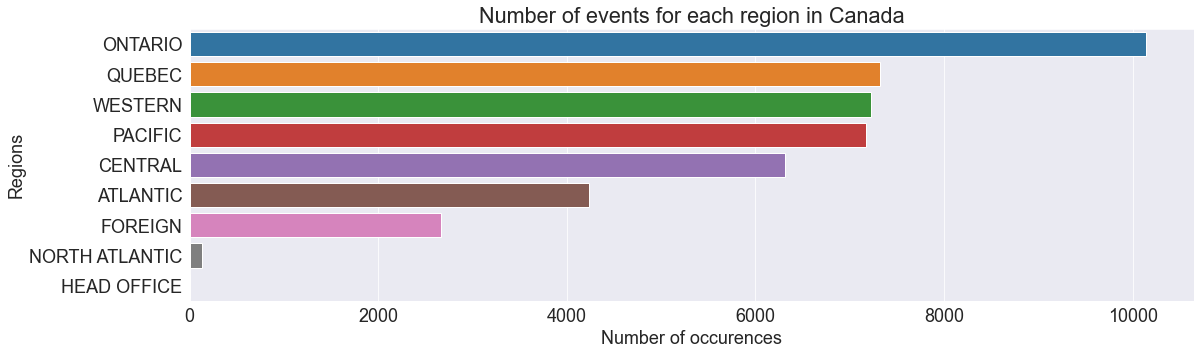

In [9]:
matplotlib.rcParams['figure.figsize'] = (18, 5)
column = 'OccRegionID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurences', ylabel = 'Regions', Title='Number of events for each region in Canada');

**ONTARIO** shows more events than the remaining regions. This is mainly due to the higher traffic density in this province. **FOREIGN** region refers to occurrences that happened outside Canada, involving canadian aircraft (manufactured, operated, etc). Let's have a look at the countries affected by these occurrences :

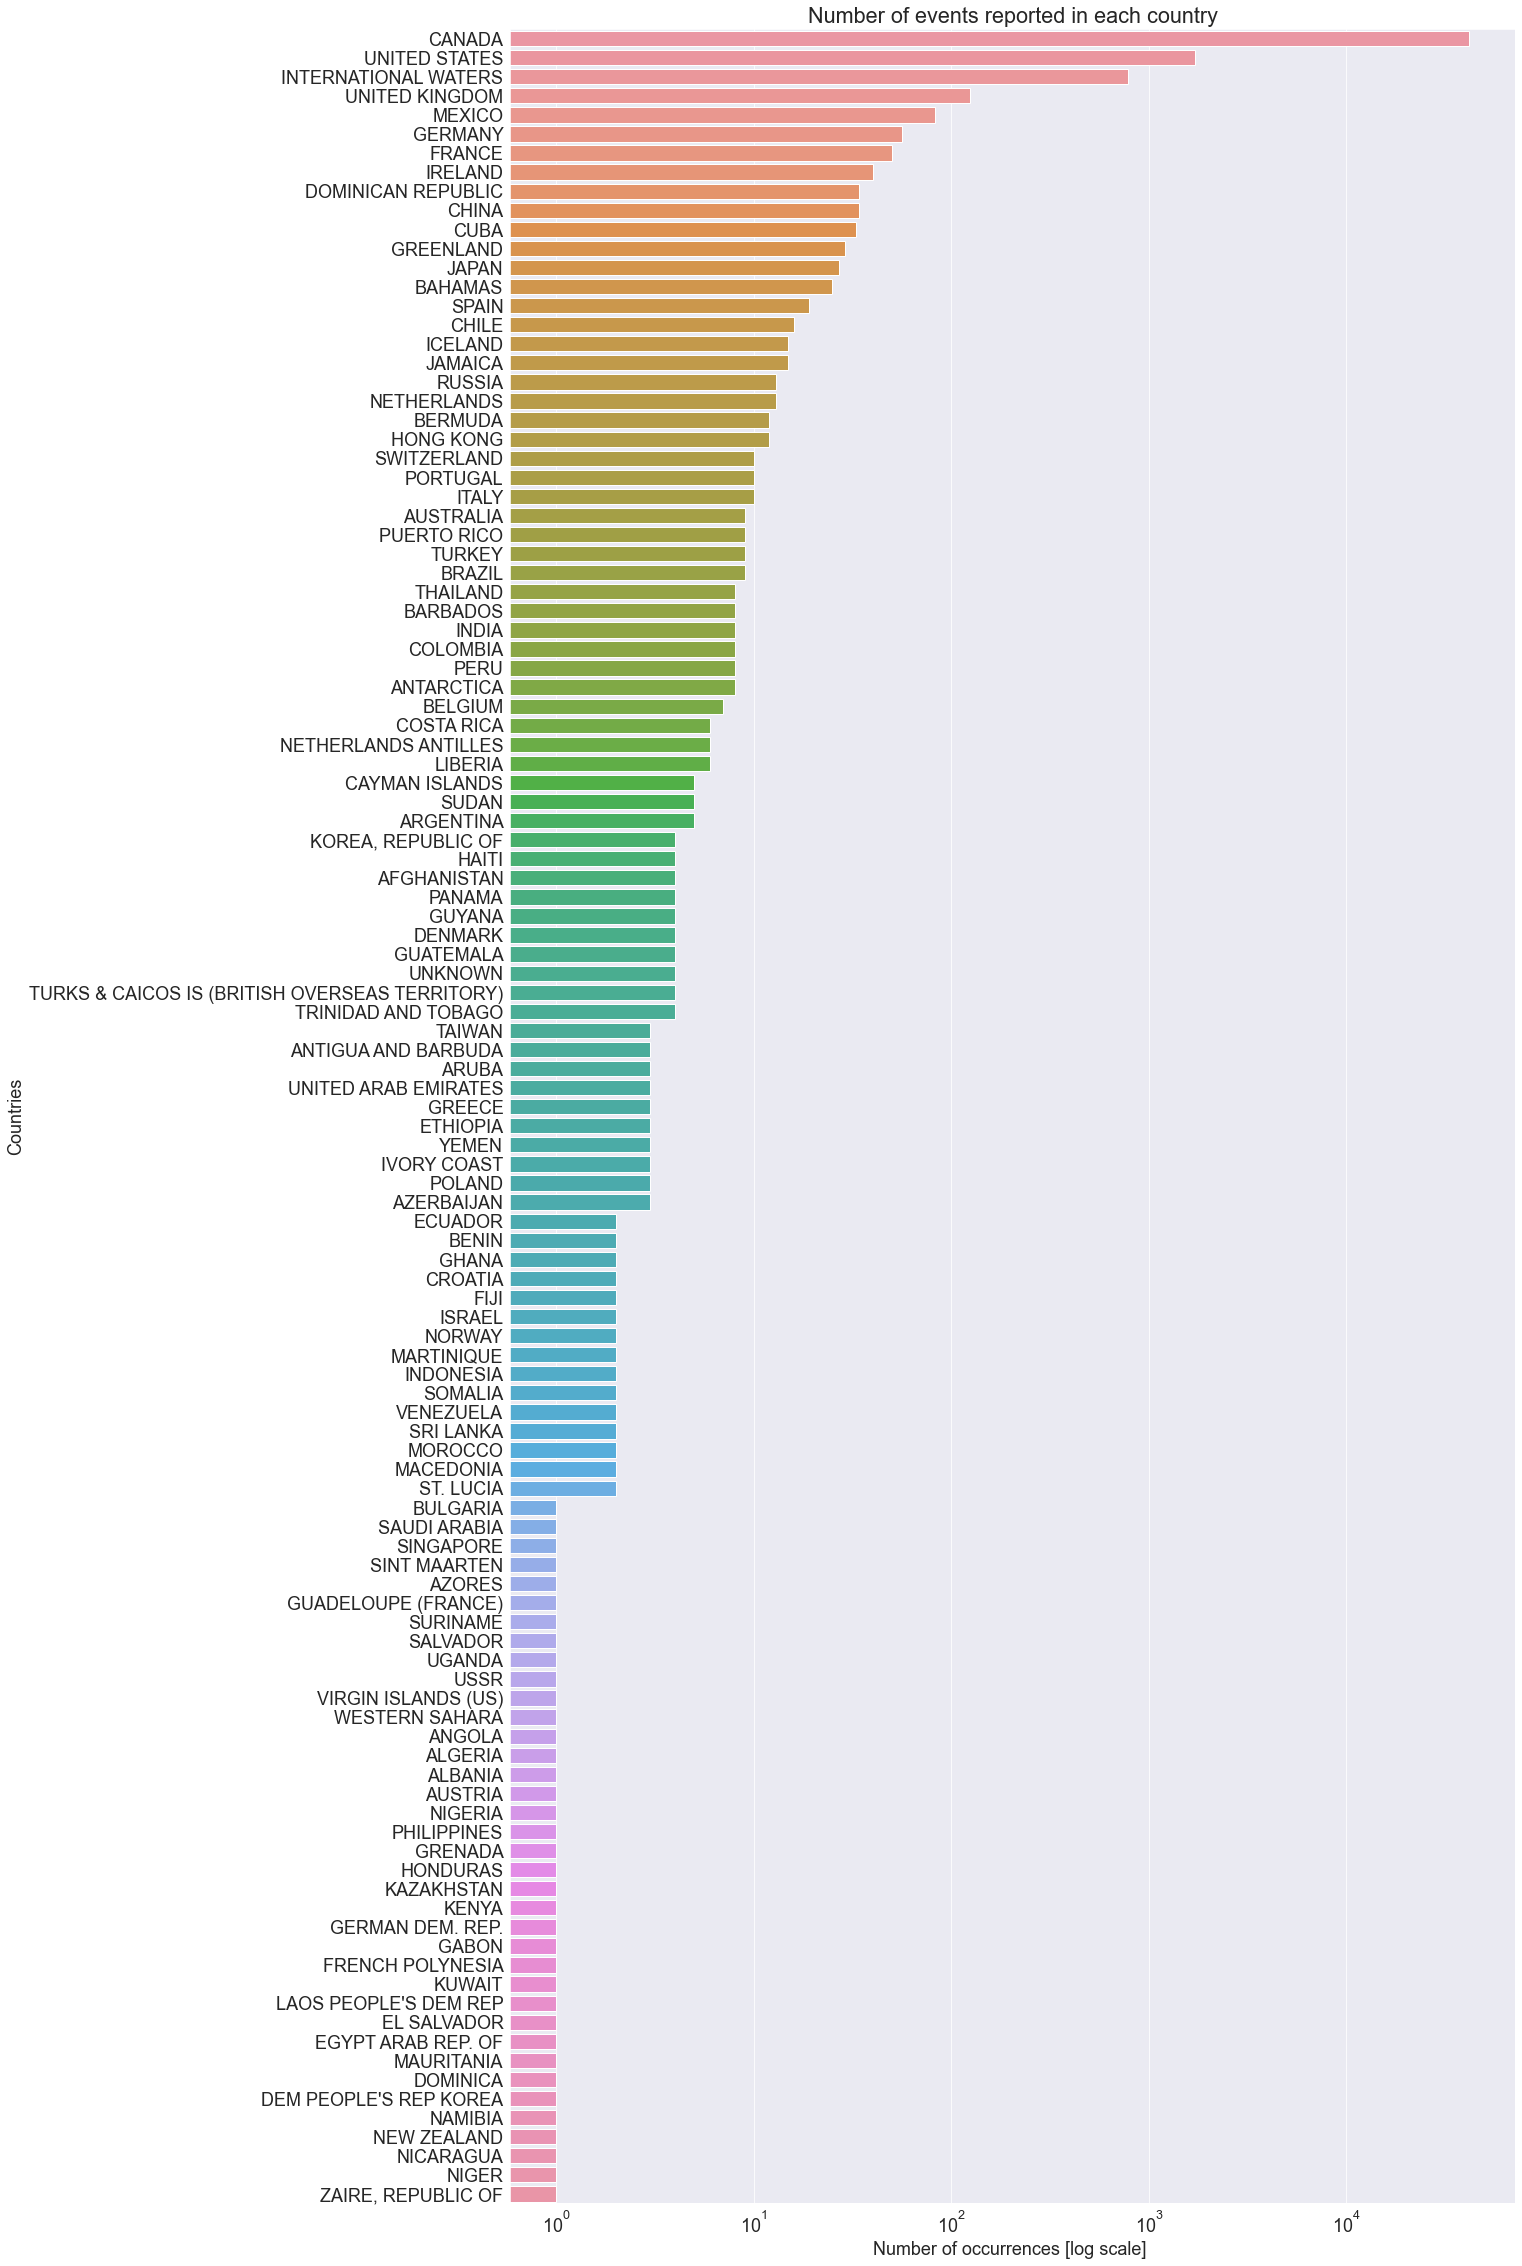

In [10]:
matplotlib.rcParams['figure.figsize'] = (18, 40)
column = 'CountryID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale('log')
fig.set(xlabel = 'Number of occurrences [log scale] ', ylabel = 'Countries', Title='Number of events reported in each country');

In [11]:
canada_count = occurence_df[occurence_df[column]=='CANADA']['OccNo'].count()
total_count = occurence_df['OccNo'].count()
print('{} events happend in Canada. Total number is {}.'.format(canada_count, total_count))

41803 events happend in Canada. Total number is 45244.


Most of the events (92.34%) happened in Canada.  
Each event is categorized, according to its main cause. The following plot shows the breakdown of events :

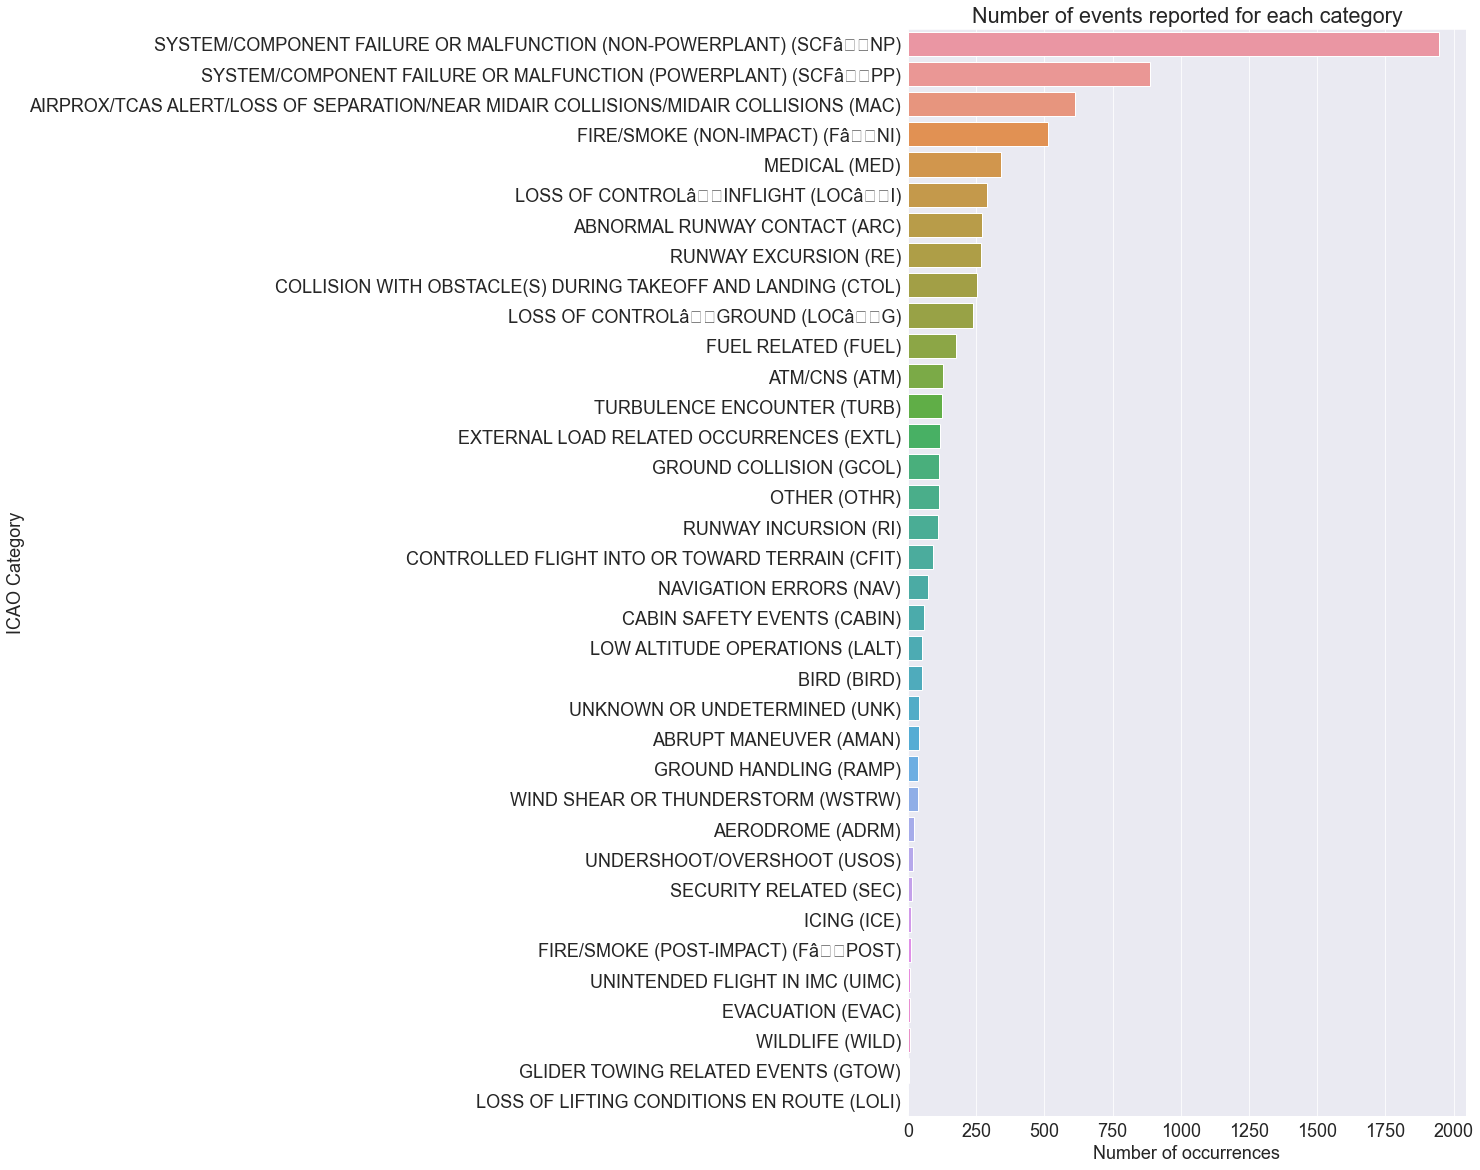

In [12]:
matplotlib.rcParams['figure.figsize'] = (10, 20)
column = 'ICAO_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'ICAO Category', Title='Number of events reported for each category');

Here is a breakdown of occurrence categories:

In [13]:
print('Events categories (%)\n',graph.head(10)/graph.sum()*100)

Events categories (%)
 ICAO_DisplayEng
SYSTEM/COMPONENT FAILURE OR MALFUNCTION (NON-POWERPLANT) (SCFâNP)                     27.448218
SYSTEM/COMPONENT FAILURE OR MALFUNCTION (POWERPLANT) (SCFâPP)                         12.498239
AIRPROX/TCAS ALERT/LOSS OF SEPARATION/NEAR MIDAIR COLLISIONS/MIDAIR COLLISIONS (MAC)     8.651543
FIRE/SMOKE (NON-IMPACT) (FâNI)                                                         7.242497
MEDICAL (MED)                                                                            4.804847
LOSS OF CONTROLâINFLIGHT (LOCâI)                                                     4.072143
ABNORMAL RUNWAY CONTACT (ARC)                                                            3.804424
RUNWAY EXCURSION (RE)                                                                    3.762153
COLLISION WITH OBSTACLE(S) DURING TAKEOFF AND LANDING (CTOL)                             3.564887
LOSS OF CONTROLâGROUND (LOCâG)                                             

System failures (related or not to engines) are the most common categories of occurences. Those numbers must be considered with caution. The incident category data misses a lot of records:

In [14]:
print(occurence_df_full['ICAO_DisplayEng'].isna().sum(),'missing records out of 45000.')

41702 missing records out of 45000.


Date information requires some manipulation in order to extract intereting data.

In [15]:
occurence_df['OccDate'] = pd.to_datetime(occurence_df['OccDate'])
occurence_df['OccYear'] = occurence_df['OccDate'].dt.year
occurence_df['OccMonth'] = occurence_df['OccDate'].dt.month
occurence_df['OccWeekday'] = occurence_df['OccDate'].dt.weekday

The first plot, regarding occurrences dates, will show the number of events reported every year.

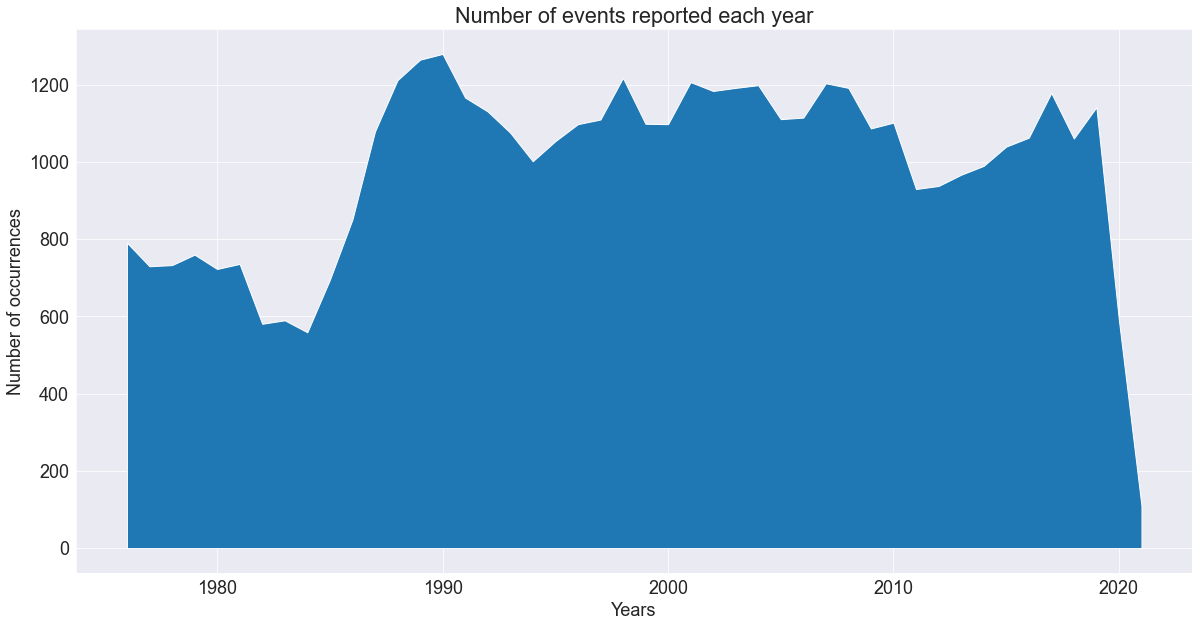

In [16]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['OccNo'].count()
plt.fill_between(data2.index, data2.values);
plt.xlabel('Years');
plt.ylabel('Number of occurrences');
plt.title('Number of events reported each year');


We have excluded events prior to 1965. The number of reported events was very low during these years. The number of occurrences seems to be steady since the 90s. An interesting comparison would include the total number of aircraft movements. Using [Statcan website](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310000201&pickMembers%5B0%5D=2.1&pickMembers%5B1%5D=4.2&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1997&cubeTimeFrame.endMonth=04&cubeTimeFrame.endYear=2021&referencePeriods=19970101%2C20210401), we can observe that overall traffic is not increasing (at least since 1997, if we exclude 2020 and 2021 due to covid-19 crisis). 

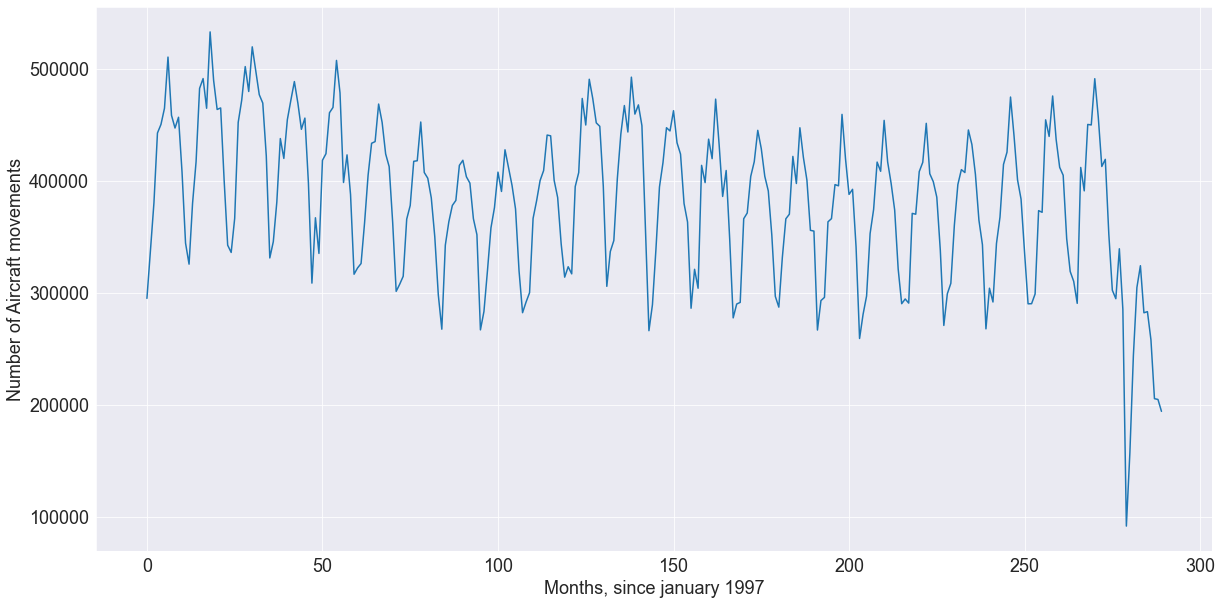

In [17]:
total_traffic_per_month = [295073,337146,380552,442854,450516,464973,510697,458663,447297,456912,407902,344482,325659,380045,417183,482710,491502,464962,533190,489821,463890,465243,400306,342608,336128,366646,452346,472217,502205,479946,519847,498412,477100,469594,422355,331220,345760,381111,437902,420143,454782,472125,488821,469541,446128,456177,398326,308714,367114,335254,418483,424343,460960,465684,507708,478667,398620,423309,387907,316658,322265,326231,362693,405125,433683,435156,468725,452305,424170,412831,363115,301364,307702,314836,365905,378116,417552,418059,452675,407577,402467,384931,350045,298217,267541,342664,363529,378121,382597,413927,418497,403773,398083,366234,352016,266931,283328,319662,358132,376230,407889,390620,427859,411896,396070,374974,319636,282289,291797,300182,366577,382264,400425,409285,441021,440333,400522,385201,343793,314044,323338,316990,394955,407534,473718,449994,490882,473606,451913,448830,395144,305836,336956,346748,402155,442058,467391,443741,492754,459748,467978,449438,358436,266203,289420,339228,394607,416342,447574,444682,462781,434142,423997,379867,363273,286269,321061,304147,413944,398521,437358,419919,473132,432291,386163,409364,348383,277661,290037,291483,366283,371370,404122,417210,445231,428915,404187,391091,351734,296863,287259,331536,366189,370297,421938,397728,447536,421029,400788,355873,355214,266787,293116,295953,363491,366338,396742,395670,459494,419687,387989,392543,341189,259238,280830,297214,352957,374535,416872,408643,454126,416991,397643,374009,321259,290319,294544,290853,371033,370288,408358,416629,451495,406442,399377,385502,338086,270894,299222,308524,360373,396811,410145,407532,445571,432552,405965,364946,343035,267840,304166,291847,344150,367705,414790,425777,474985,440303,400950,383760,336210,290225,290320,298983,373493,371989,454638,439791,475931,436955,412189,405096,348431,319111,310268,290654,412066,391156,450495,450060,491377,456956,412919,419319,352500,302368,294785,339424,285335,91600,157118,244049,304795,324274,282202,283235,258053,205465,204773,194127]
plt.plot(total_traffic_per_month);
plt.xlabel('Months, since january 1997');
plt.ylabel('Number of Aircraft movements');

Note that this graph shows the number of movements at airports, and not the number of passengers. Using the two plots, we can observe that the number of events is somewhat constant with regard to traffic density.  
  
    
The following plot tries to answer the question : are there periods of the year where more events occure ?

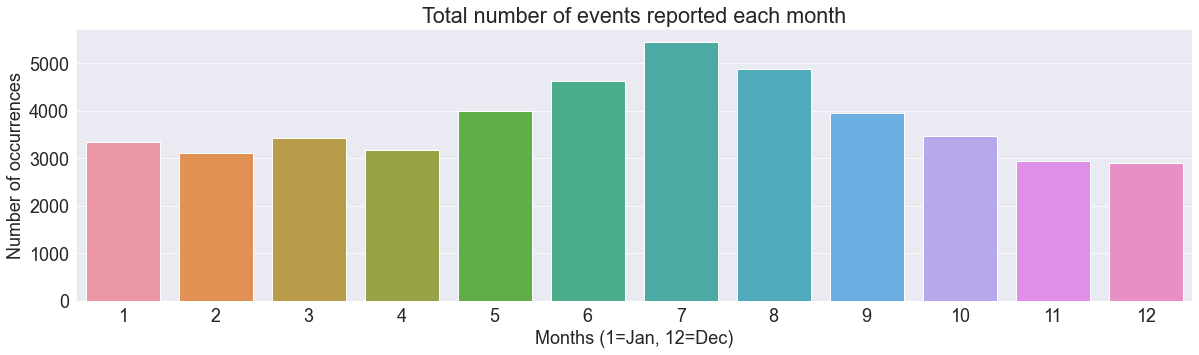

In [18]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccMonth'
fig = sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Months (1=Jan, 12=Dec)', ylabel = 'Number of occurrences', Title='Total number of events reported each month');

And the answer is Yes! It appears that summer months (5,6,7,8) are more affected by occurrences. This can be associated to the high density of traffic during summer. The previous graph confirms this cyclical pattern of traffic.  
Can we have similar results if we consider weekdays ?

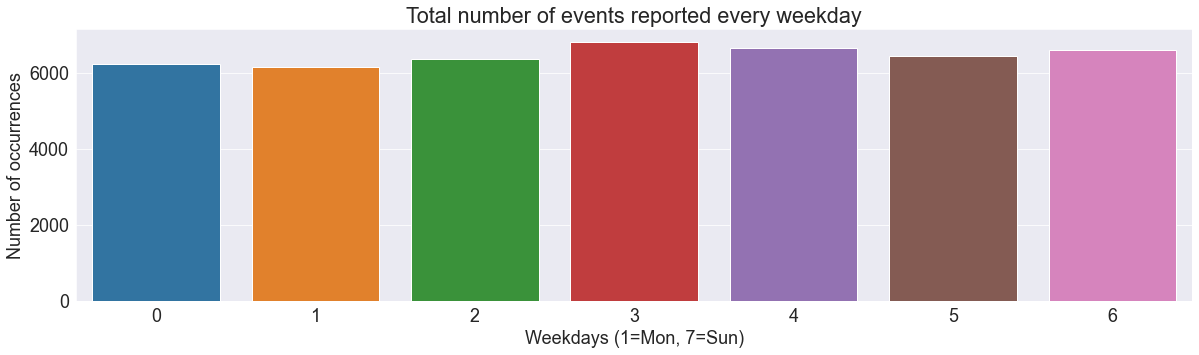

In [19]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccWeekday'
fig = sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Weekdays (1=Mon, 7=Sun)', ylabel = 'Number of occurrences', Title='Total number of events reported every weekday');

The result shows that there is almost no correlation between the number of events and weekdays.  
  
Next, we look at the incident type breakdown (as defined by Transportation Safety Board).

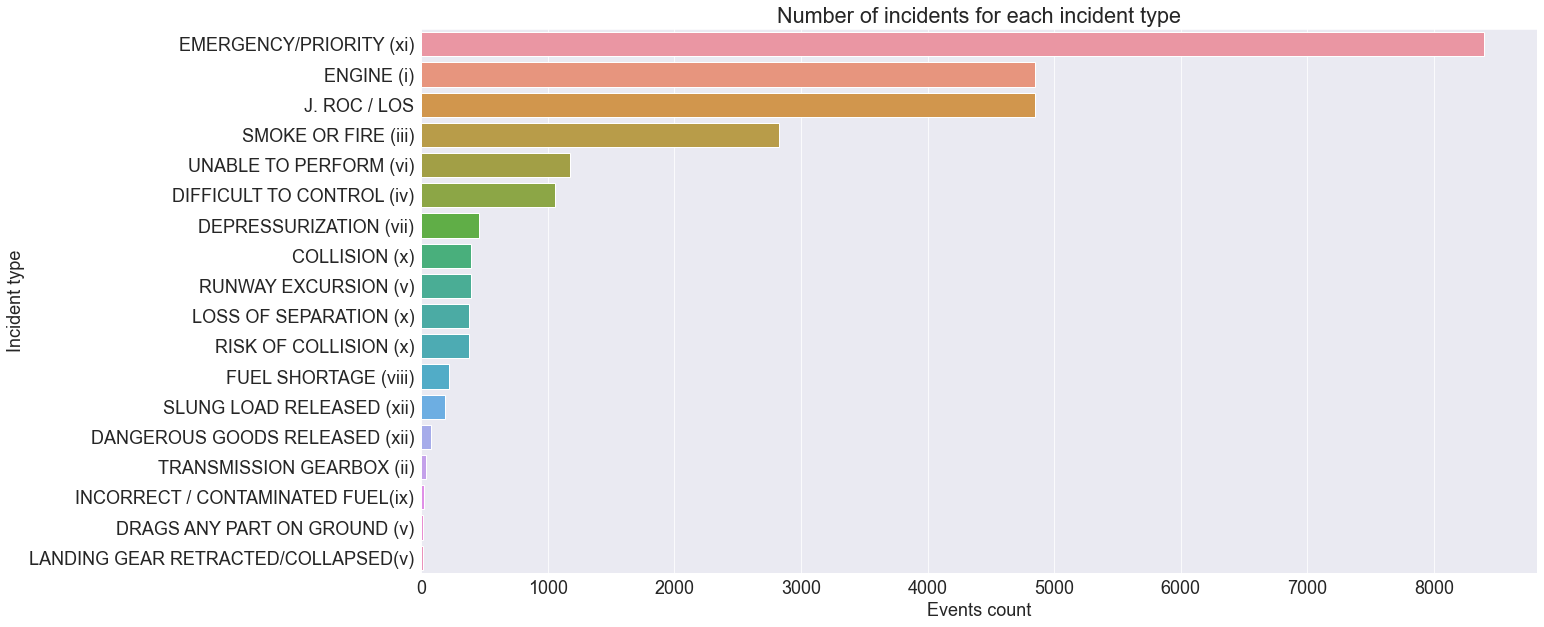

In [20]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccIncidentTypeID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Incident type', Title='Number of incidents for each incident type');

In contrast to the incident category used in a previous plot, this column is missing less data.

In [24]:
print(occurence_df_full['OccIncidentTypeID_DisplayEng'].isna().sum(),'missing records out of 45000.')

22381 missing records out of 45000.


This is still close to 50% of missing data. Nonetheless, 22381 records show that emergencies are the top category of incidents.  
  
In aviation, time is usually provided in UTC (GMT) standard format. Because of the large area of Canada, this information cannot give an intuition about the time of day. In our dataset, some of the events are not reported in UTC time. Let's take a look at the breakdown of occurrences.

In [21]:
occurence_df['OccTime'] = pd.to_datetime(occurence_df['OccTime'])
occurence_df['OccHour'] = occurence_df['OccTime'].dt.hour
occurence_df['OccMinute'] = occurence_df['OccTime'].dt.minute

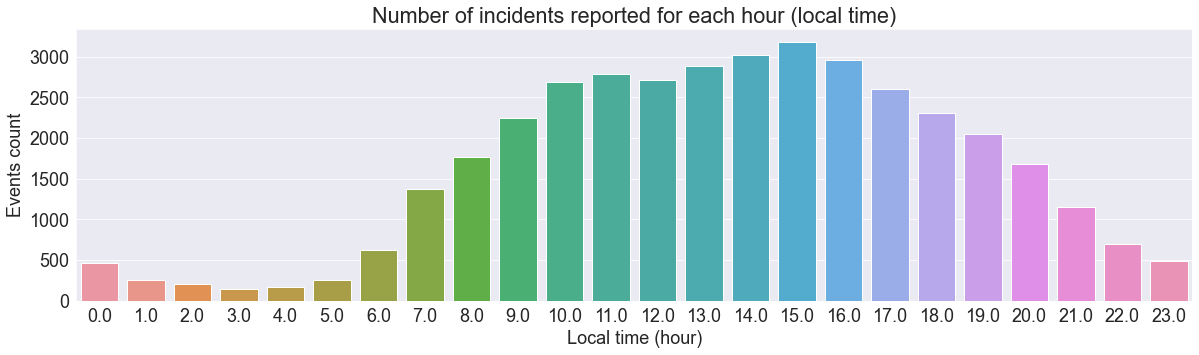

In [23]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccHour'
fig = sns.countplot(x=column, data = occurence_df[occurence_df['TimeZoneID_DisplayEng'] !='UTC'].dropna(subset=[column]));
fig.set(xlabel = 'Local time (hour)', ylabel = 'Events count', Title='Number of incidents reported for each hour (local time)');

It comes out that most occurrences happen during daytime. Obviously, traffic density during day is higher, and the risk of incident increases.  
Next, we look at the incident/accident breakdown.

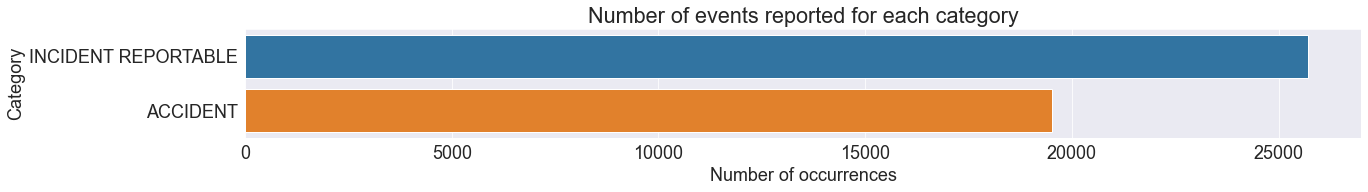

In [25]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'OccTypeID_DisplayEng'
fig = sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Number of occurrences', ylabel = 'Category', Title='Number of events reported for each category');

Statistically, there are more incidents (not involving fatal injuries, or aircraft damage) than accidents. With that being said, about 40% of events are categorized as accidents. Let's see if this rate is changing with time.

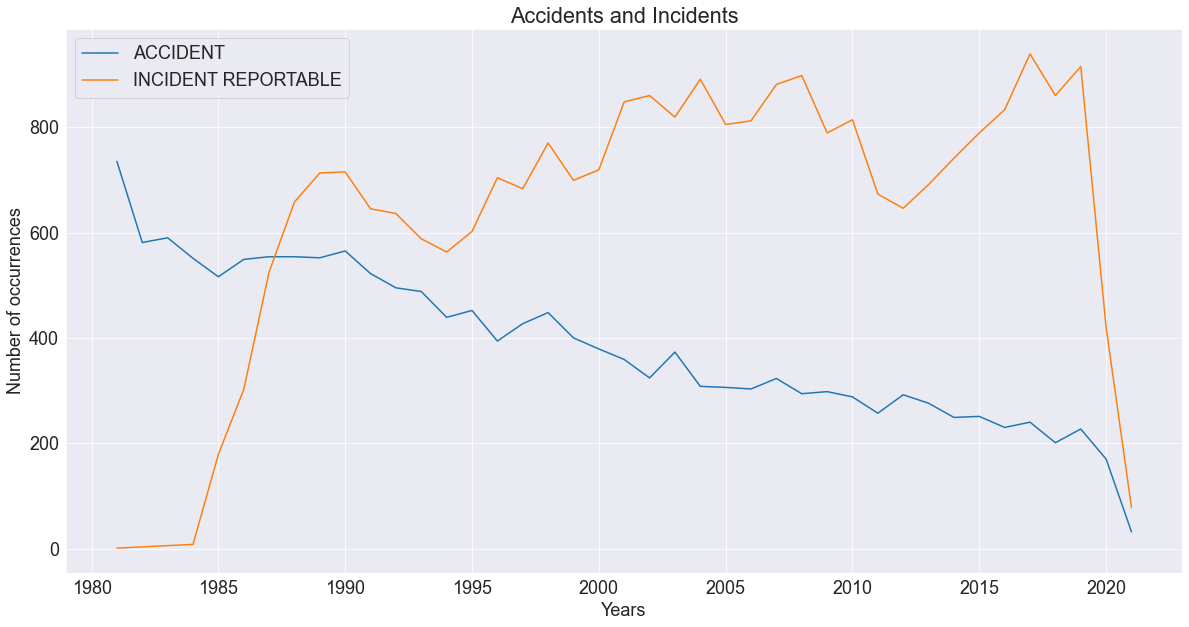

In [50]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
sub_occ1 = occurence_df[occurence_df['OccTypeID_DisplayEng']=='ACCIDENT']
sub_occ2 = occurence_df[occurence_df['OccTypeID_DisplayEng']=='INCIDENT REPORTABLE']

data = sub_occ1[sub_occ1[column]>1980].dropna(subset=[column])
data2 = data.groupby(column)['OccNo'].count()

data3 = sub_occ2[sub_occ2[column]>1980].dropna(subset=[column])
data4 = data3.groupby(column)['OccNo'].count()

plt.plot(data2.index, data2.values, label='ACCIDENT');
plt.plot(data4.index, data4.values, label = 'INCIDENT REPORTABLE');

plt.xlabel('Years');
plt.ylabel('Number of occurrences');
plt.title('Accidents and Incidents');
plt.legend();

The result is encouraging! the rate of accidents among the reported events is decreasing. This means that there are less fatal injuries and substantial damages.  
  
In Canada, aviation occurences are reported by multiple agencies/individuals. Let's plot the breakdown of data sources. 

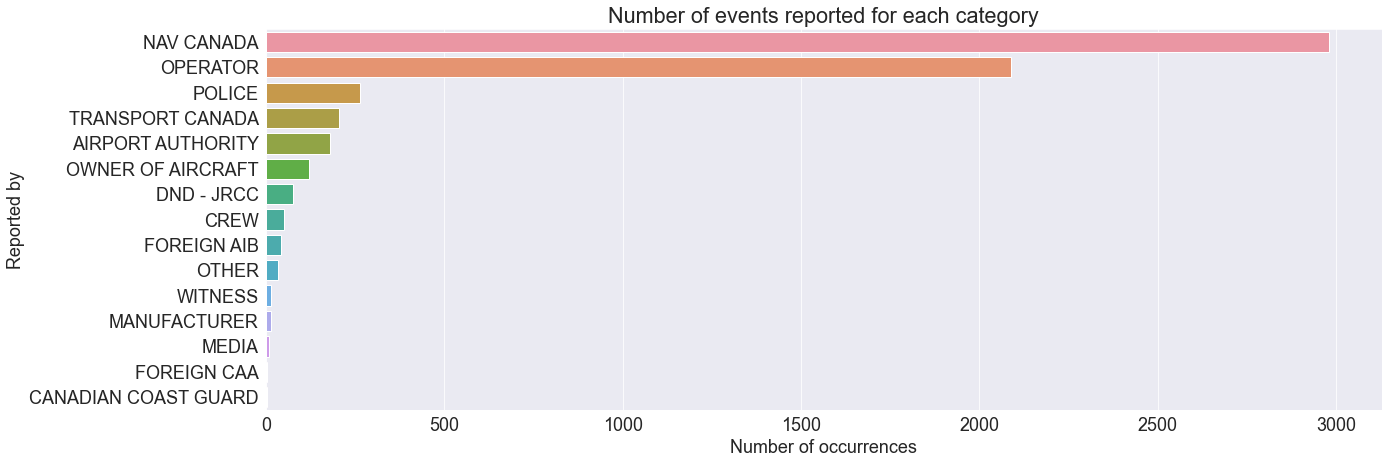

In [53]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'ReportedByID_DisplayEng'
graph =  occurence_df[occurence_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'Reported by', Title='Number of events reported for each category');

First, we observe that this column is missing a lot of data. Based on the available records, it turns out that Nav Canada and operators have reported most of occurrences.  
In the introduction, we stated that some incidents can be classified as *serious* incidents if an accident nearly occurred. This information is available in the dataset.

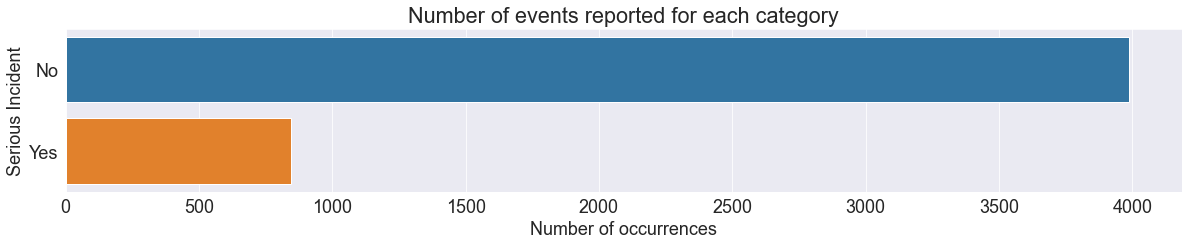

In [55]:
matplotlib.rcParams['figure.figsize'] = (20, 3)
column = 'SeriousIncidentEnum_DisplayEng'
graph =  occurence_df[occurence_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'Serious Incident', Title='Number of events reported for each category');

This column is almost empty (90% of data is missing). We couldn't base any analysis on this data.

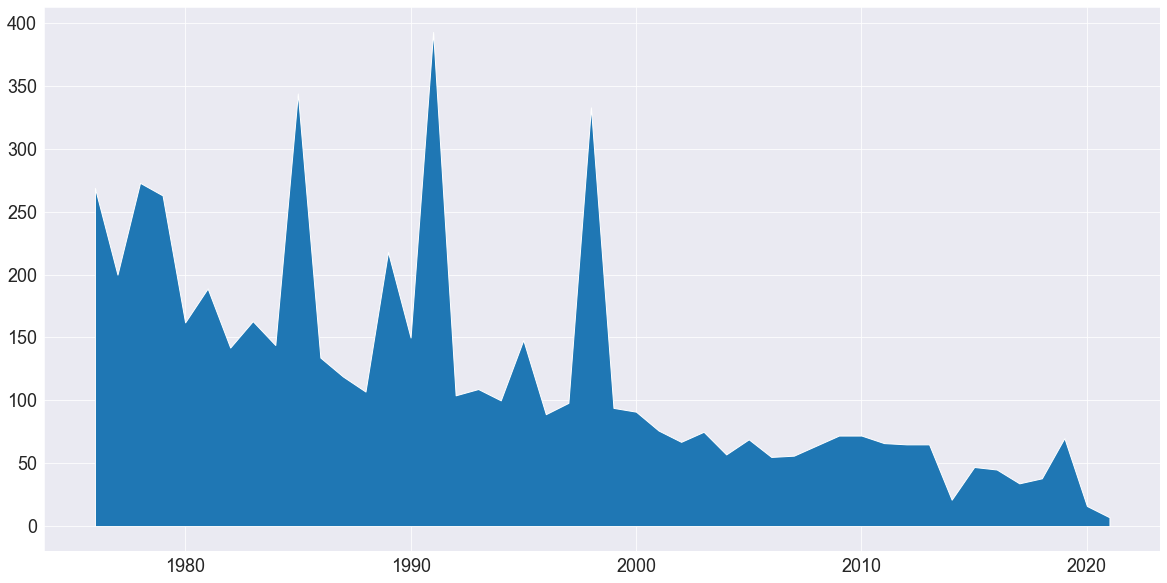

In [60]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalFatalCount'].sum()
plt.fill_between(data2.index, data2.values);

In [62]:
# 10 worst accidents, by death count
data = occurence_df.sort_values('TotalFatalCount',ascending=False)[['OccDate','TotalFatalCount','OccNo','CountryID_DisplayEng']].head(10)
OccNos = data['OccNo'].values
print(list(data.columns),'[AircraftModelID_DisplayEng','OrganizationID_DisplayEng]')
for OccNo in OccNos:
    print(data[data['OccNo']==OccNo].values, aircraft_df[aircraft_df['OccNo']==OccNo][['AircraftModelID_DisplayEng','OrganizationID_DisplayEng']].values)
### let's consider the top 3
fatal1 = occurence_df[occurence_df['OccYear']==1985]['TotalFatalCount'].max()
fatal2 = occurence_df[occurence_df['OccYear']==1991]['TotalFatalCount'].max()
fatal3 = occurence_df[occurence_df['OccYear']==1998]['TotalFatalCount'].max()
OccNo1 = occurence_df[occurence_df['TotalFatalCount']==fatal1]['OccNo']
OccNo2 = occurence_df[occurence_df['TotalFatalCount']==fatal2]['OccNo']
OccNo3 = occurence_df[occurence_df['TotalFatalCount']==fatal3]['OccNo']
event1 = occurence_df[occurence_df['OccNo']==OccNo1.values[0]]['Summary'].values[0]
event2 = occurence_df[occurence_df['OccNo']==OccNo2.values[0]]['Summary'].values[0]
event3 = occurence_df[occurence_df['OccNo']==OccNo3.values[0]]['Summary'].values[0]
aircraft1 = aircraft_df[aircraft_df['OccNo']==OccNo1.values[0]]['AircraftModelID_DisplayEng']
aircraft2 = aircraft_df[aircraft_df['OccNo']==OccNo2.values[0]]['AircraftModelID_DisplayEng']
aircraft3 = aircraft_df[aircraft_df['OccNo']==OccNo3.values[0]]['AircraftModelID_DisplayEng']
date1 = occurence_df[occurence_df['OccNo']==OccNo1.values[0]]['OccDate']
date2 = occurence_df[occurence_df['OccNo']==OccNo2.values[0]]['OccDate']
date3 = occurence_df[occurence_df['OccNo']==OccNo3.values[0]]['OccDate']

['OccDate', 'TotalFatalCount', 'OccNo', 'CountryID_DisplayEng'] [AircraftModelID_DisplayEng OrganizationID_DisplayEng]
[[Timestamp('1991-07-11 00:00:00') 261 'A91F0011' 'SAUDI ARABIA']] [['DC-8-61' 'NATIONAIR (NOLISAIR)']]
[[Timestamp('1985-12-12 00:00:00') 256 'A85H0902' 'CANADA']] [['DC-8-63' 'ARROW AIR']]
[[Timestamp('1998-09-02 00:00:00') 229 'A98H0003' 'CANADA']] [['MD-11' 'SWISSAIR']]
[[Timestamp('1976-01-01 00:00:00') 62 'A76P7962' 'CANADA']] [['DC-4M2' nan]]
[[Timestamp('1989-09-08 00:00:00') 55 'A89H0011' 'DENMARK']] [['CV580' 'PARTNAIR']]
[[Timestamp('1978-02-11 00:00:00') 43 'A78H0001' 'CANADA']] [['737-200' 'PACIFIC WESTERN AIRLINES']]
[[Timestamp('1989-03-10 00:00:00') 24 'A89C0048' 'CANADA']] [['F-28 MK 1000' 'AIR ONTARIO']]
[[Timestamp('1983-06-02 00:00:00') 23 'A83F0006' 'UNITED STATES']] [['DC-9-32' 'AIR CANADA']]
[[Timestamp('1990-04-18 00:00:00') 20 'A90H0004' 'PANAMA']] [['DHC-6-200' 'AEROPERLAS S.A.']]
[[Timestamp('1990-09-11 00:00:00') 18 'A90A0214' 'INTERNATIONAL

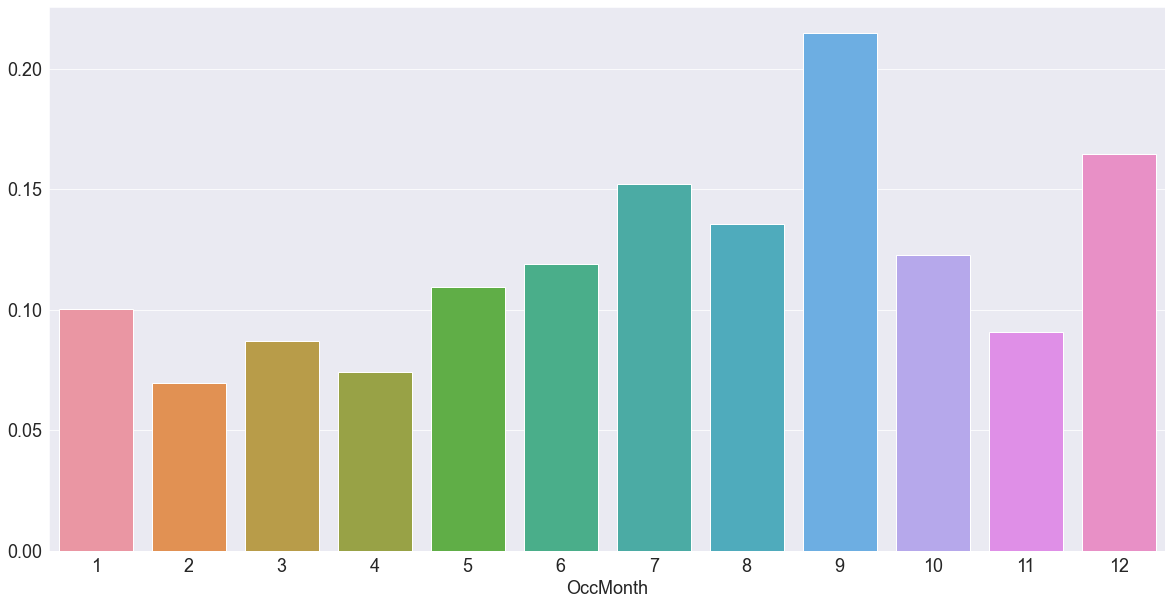

In [68]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccMonth').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

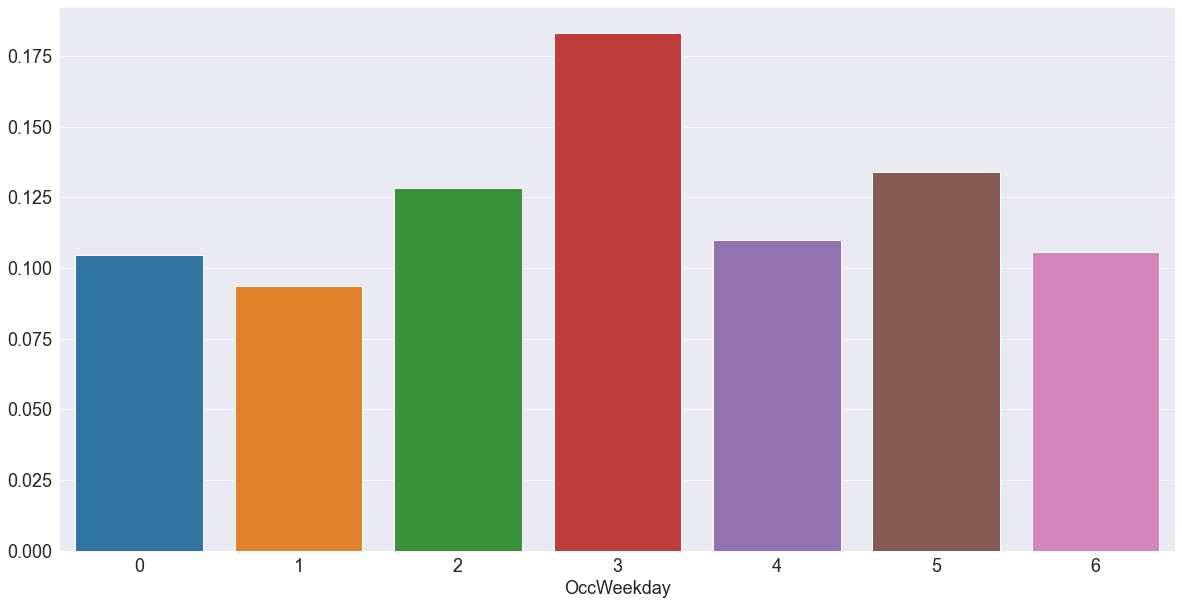

In [66]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccWeekday').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

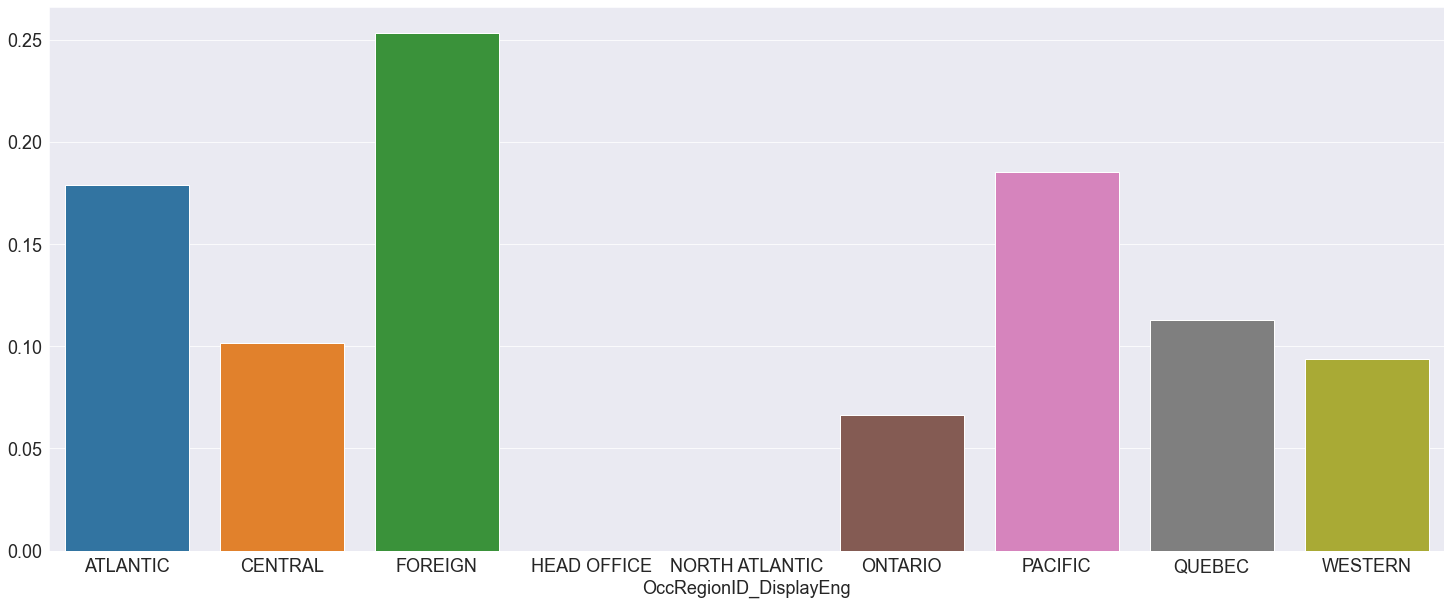

In [25]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
data = occurence_df.groupby('OccRegionID_DisplayEng').TotalFatalCount.mean()
sns.barplot(x = data.index, y = data.values);

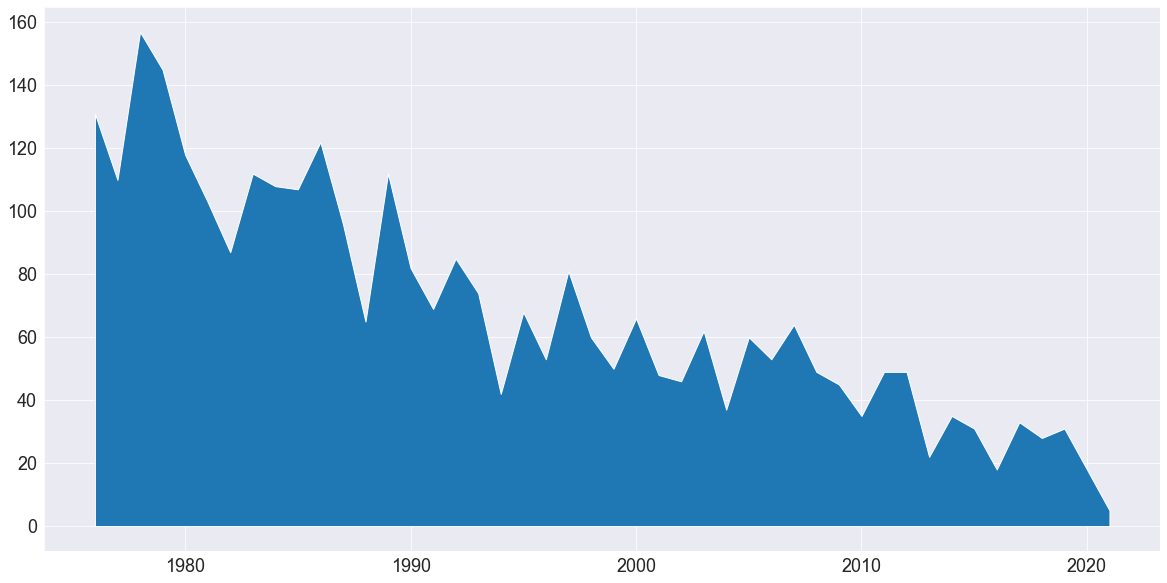

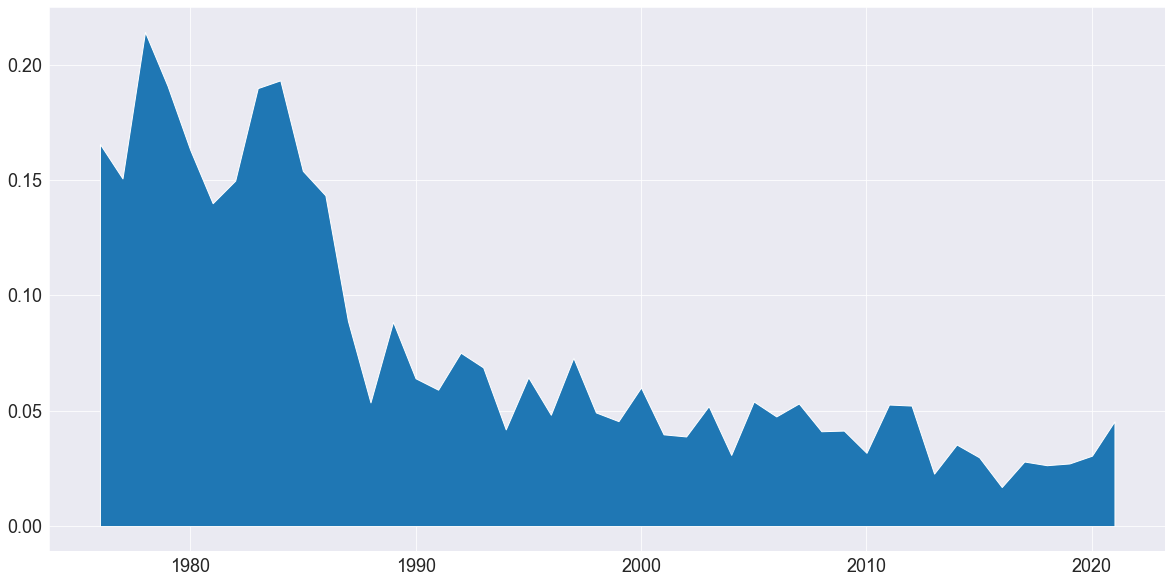

In [69]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalSeriousCount'].sum()
plt.fill_between(data2.index, data2.values);
plt.figure()
data3= data.groupby(column)['TotalSeriousCount'].mean()
plt.fill_between(data3.index, data3.values);

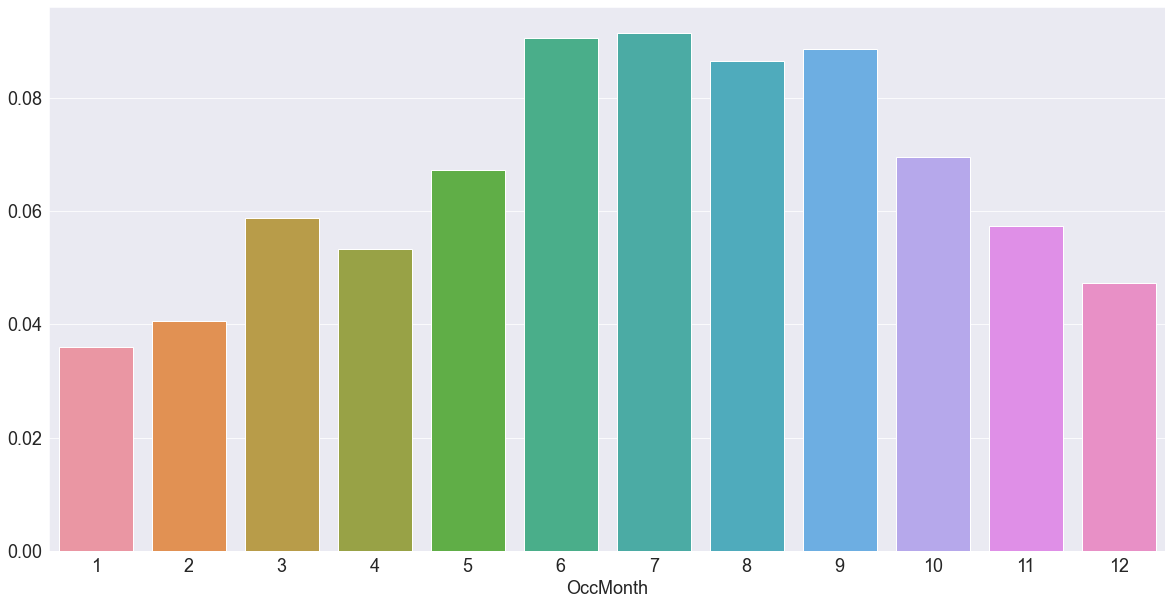

In [70]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccMonth').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

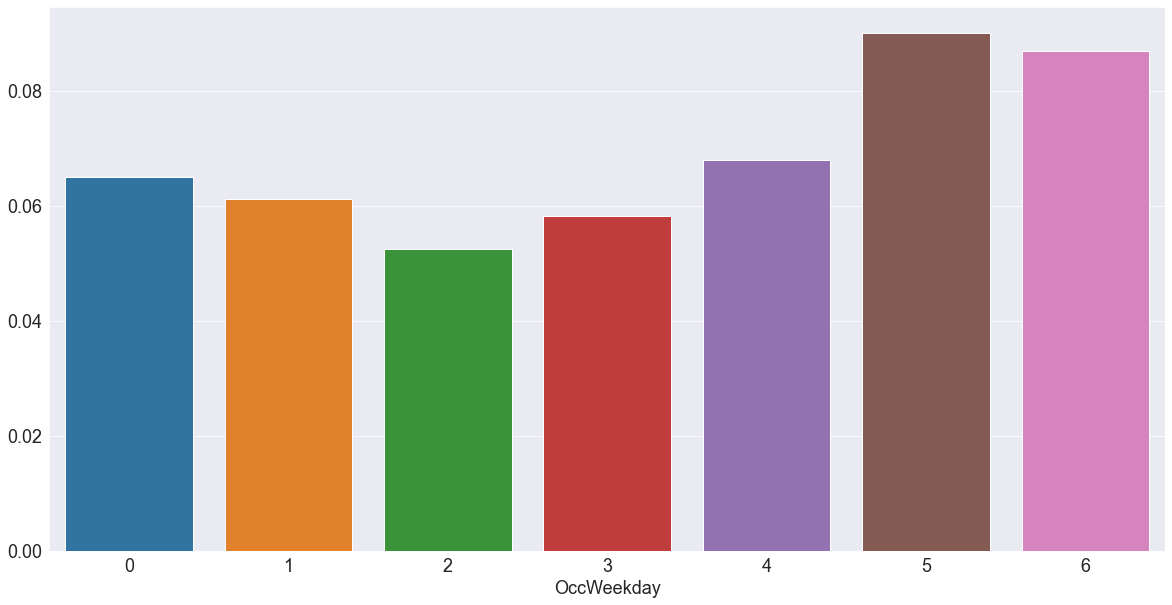

In [71]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
data = occurence_df.groupby('OccWeekday').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

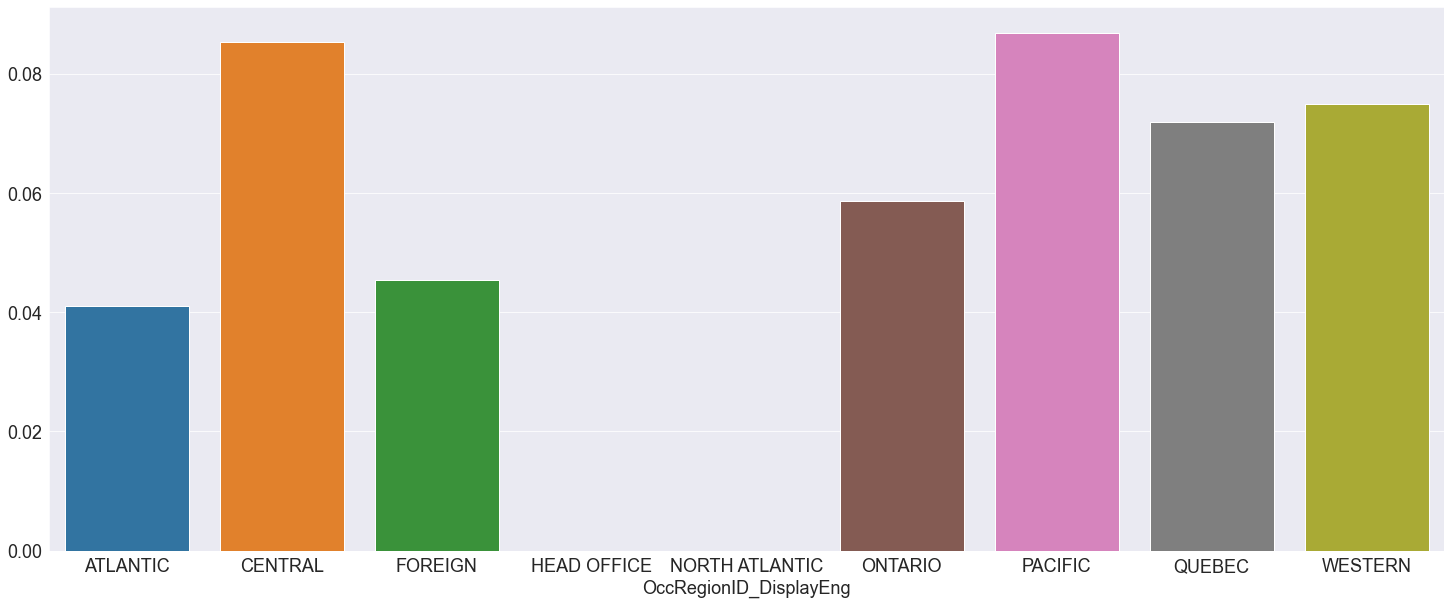

In [72]:
matplotlib.rcParams['figure.figsize'] = (25, 10)
data = occurence_df.groupby('OccRegionID_DisplayEng').TotalSeriousCount.mean()
sns.barplot(x = data.index, y = data.values);

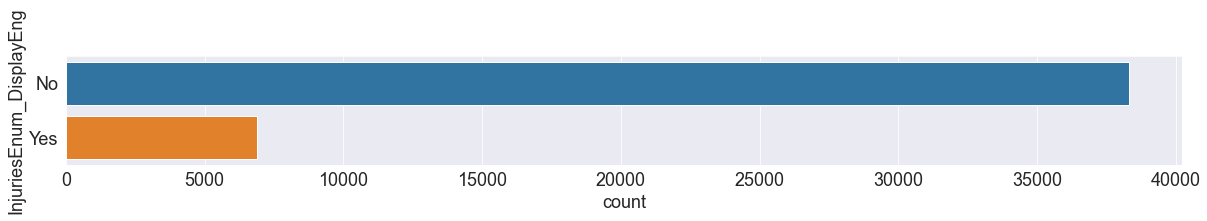

In [73]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'InjuriesEnum_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='Unknown'].dropna(subset=[column]));

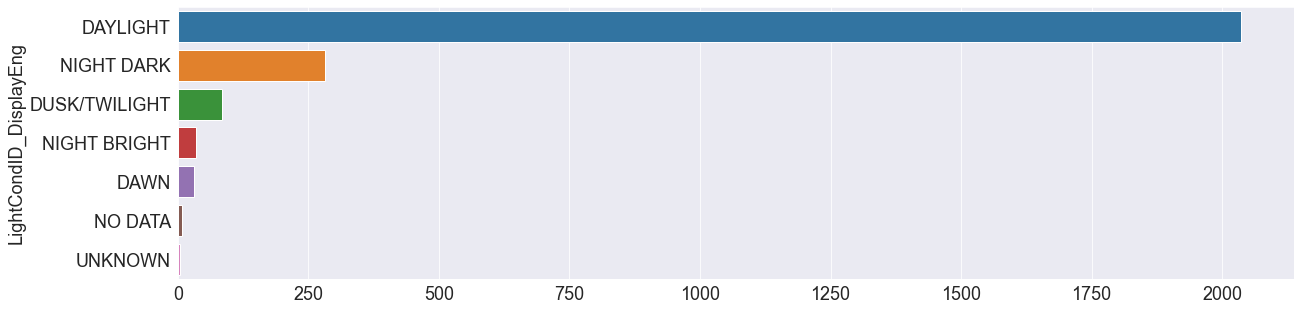

In [75]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'LightCondID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

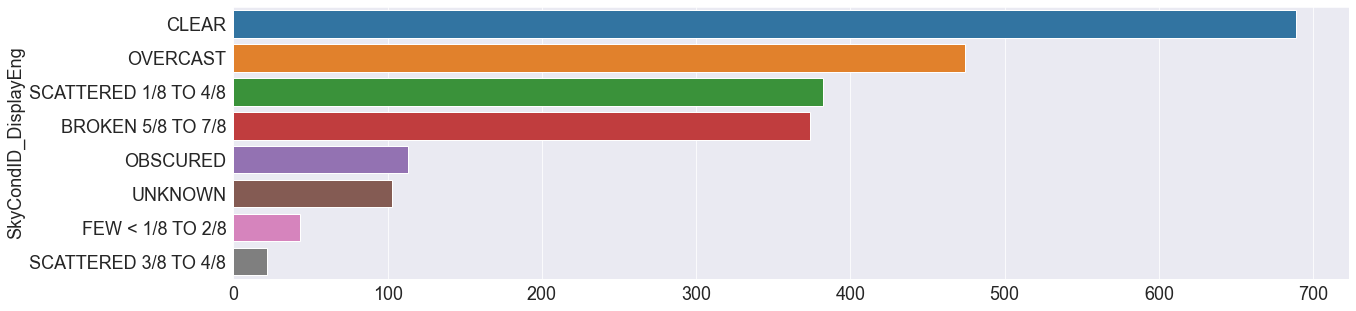

In [76]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'SkyCondID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

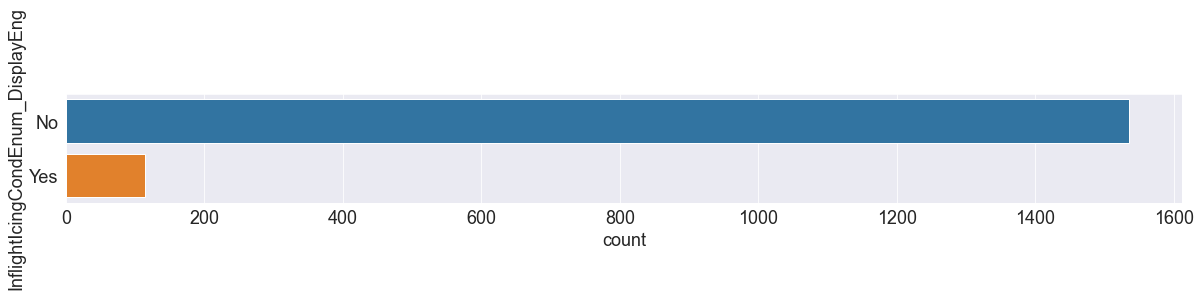

In [77]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'InflightIcingCondEnum_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='Unknown'].dropna(subset=[column]));

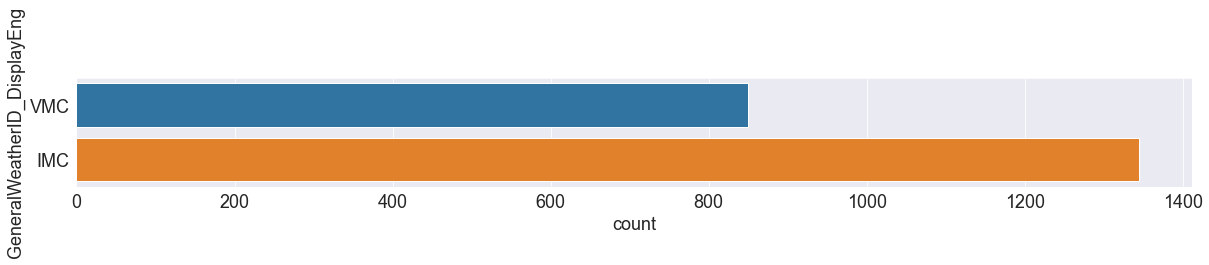

In [78]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'GeneralWeatherID_DisplayEng'
sns.countplot(y=column, data = occurence_df[occurence_df[column]!='UNKNOWN'].dropna(subset=[column]));

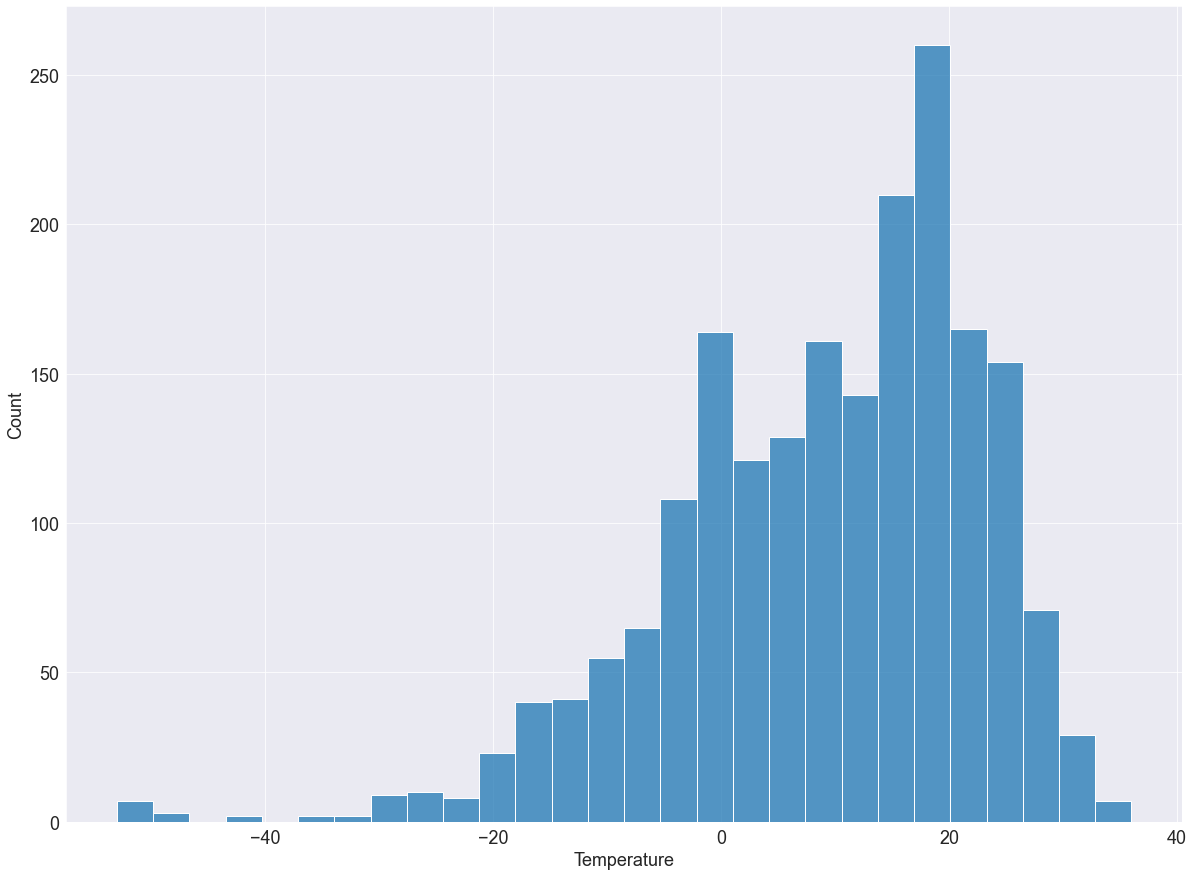

In [81]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'Temperature'
sns.histplot(x=column, data = occurence_df.dropna(subset=[column]));

In [84]:
print('Average temperature is {:.2f} deg'.format(np.mean(occurence_df[column])))
print('Standar deviation is {:.2f} deg'.format(np.std(occurence_df[column])))


Average temperature is 9.23 deg
Standar deviation is 13.52 deg


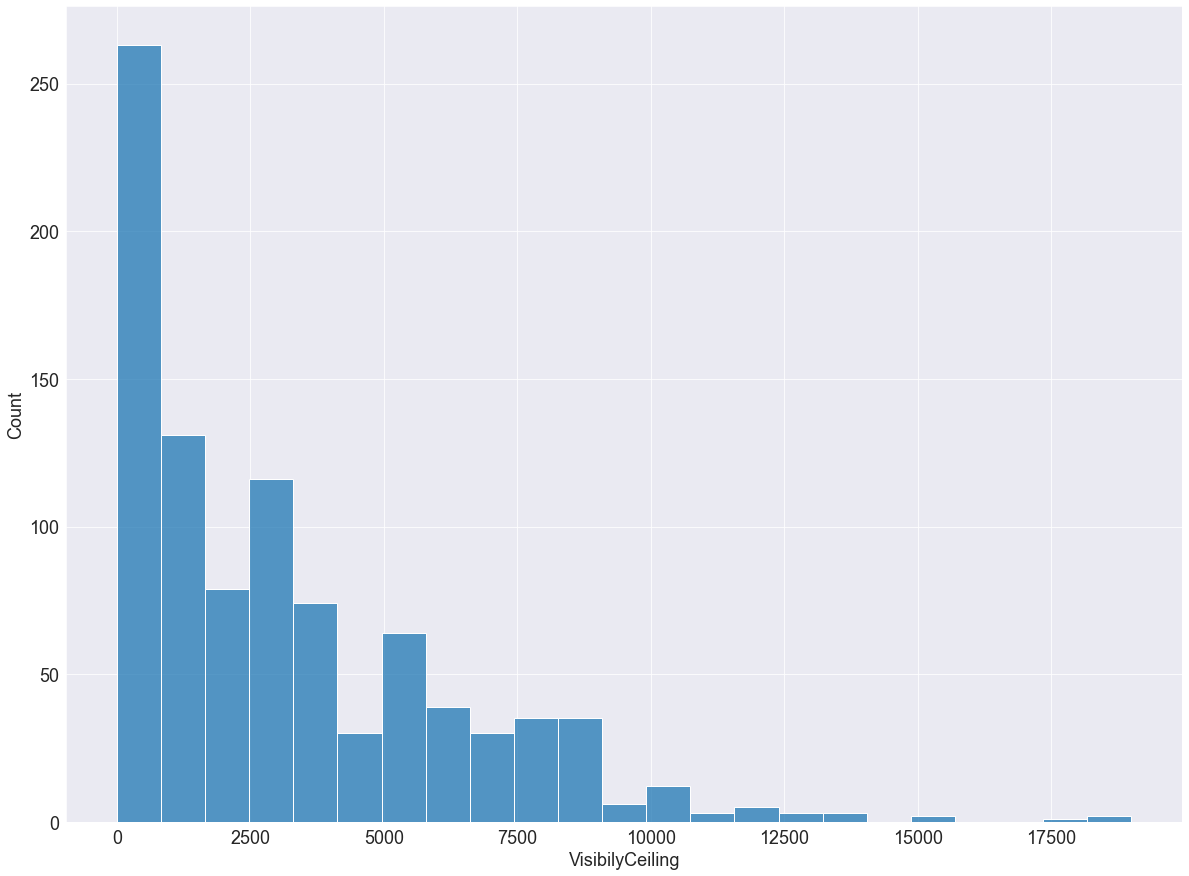

In [85]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'VisibilyCeiling'
sns.histplot(x=column, data = occurence_df[occurence_df['VisibilyCeiling']<20000].dropna(subset=[column]));

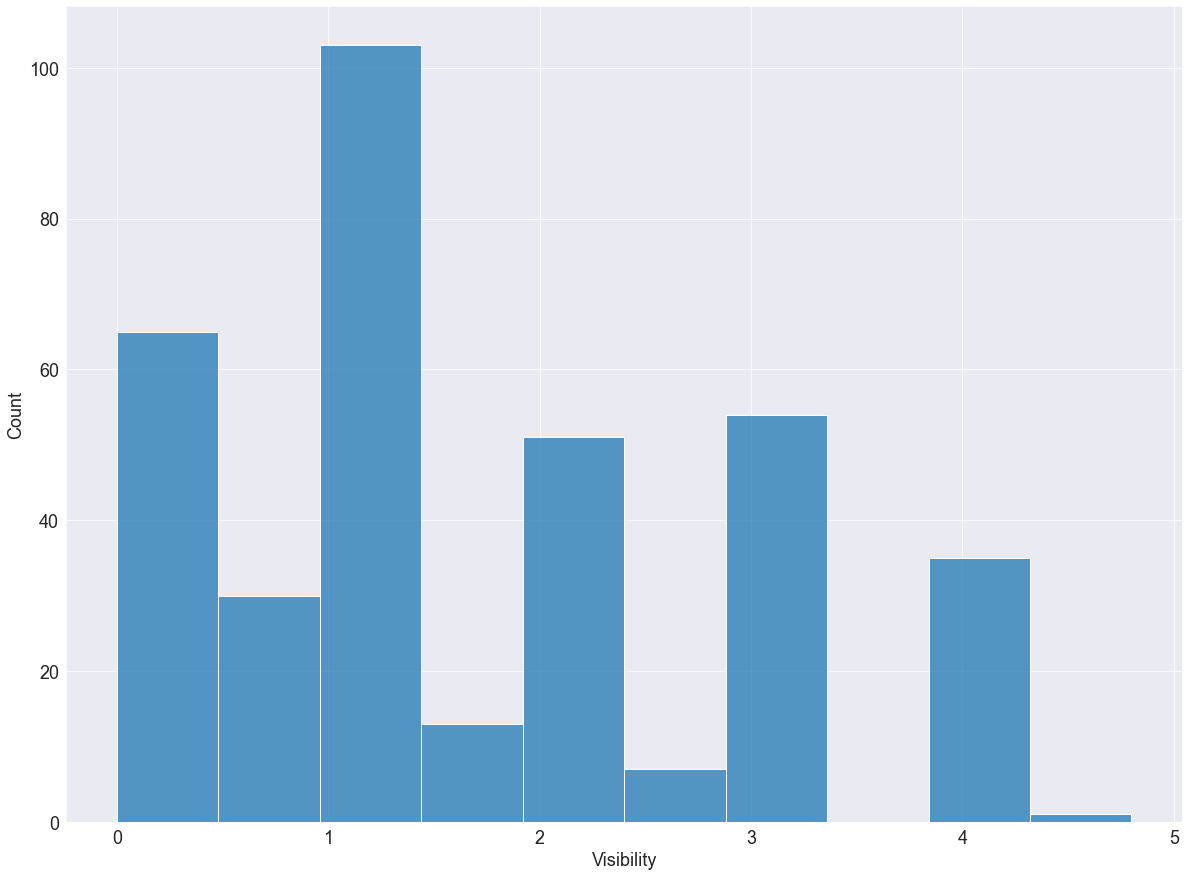

In [86]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'Visibility'
sns.histplot(x=column, data = occurence_df[occurence_df['Visibility']<5].dropna(subset=[column]));

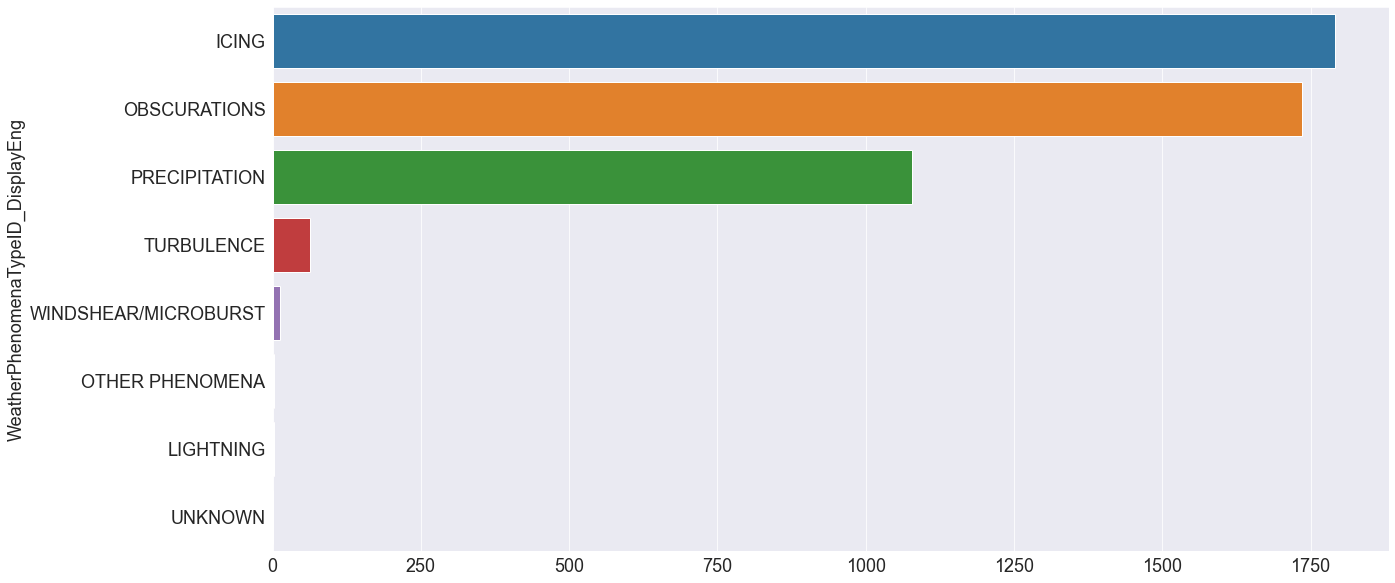

In [87]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'WeatherPhenomenaTypeID_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

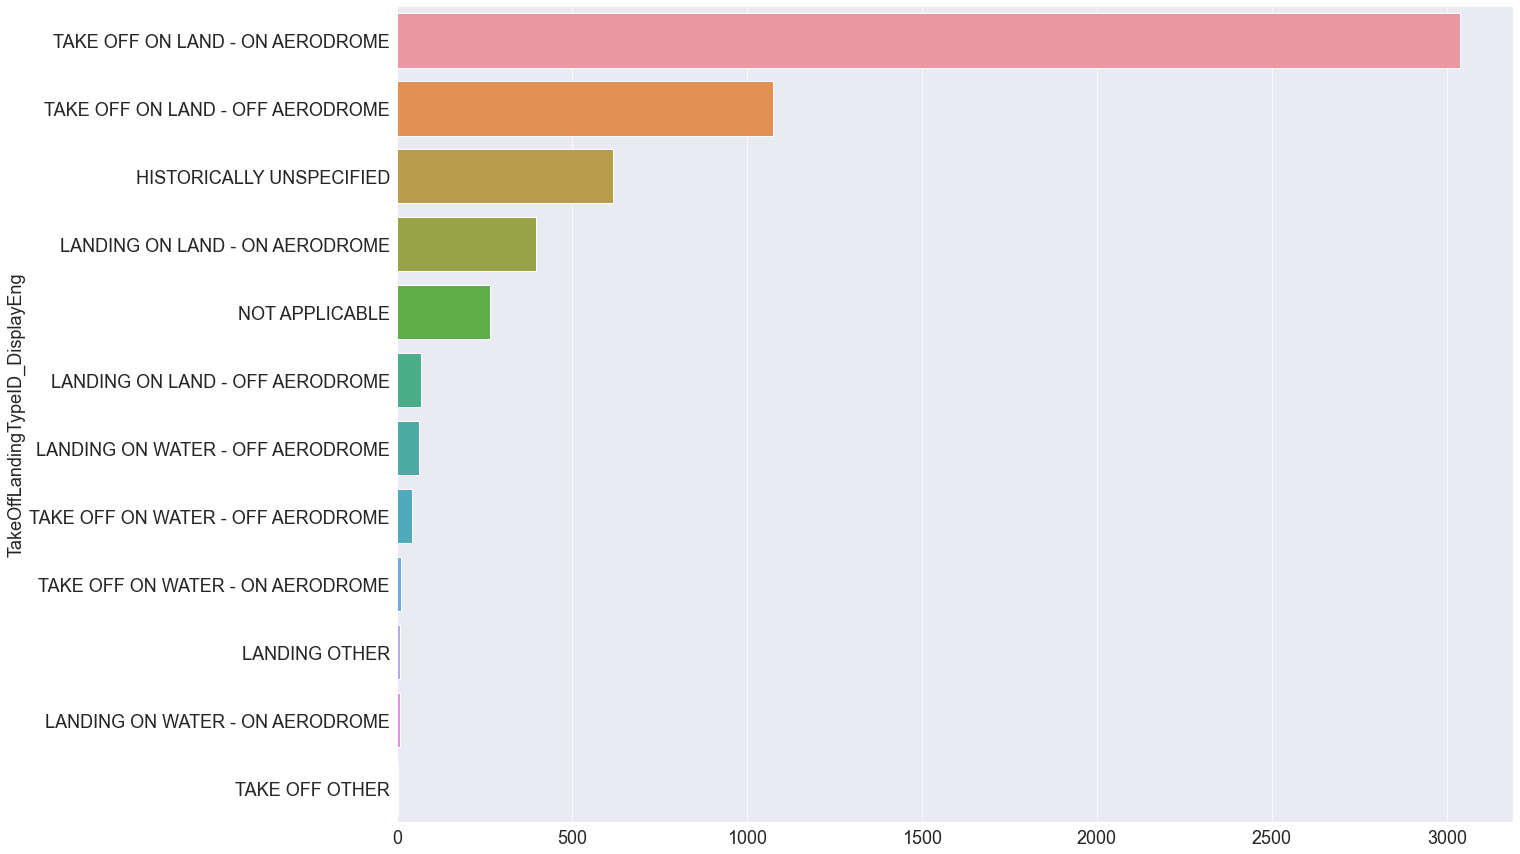

In [88]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'TakeOffLandingTypeID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

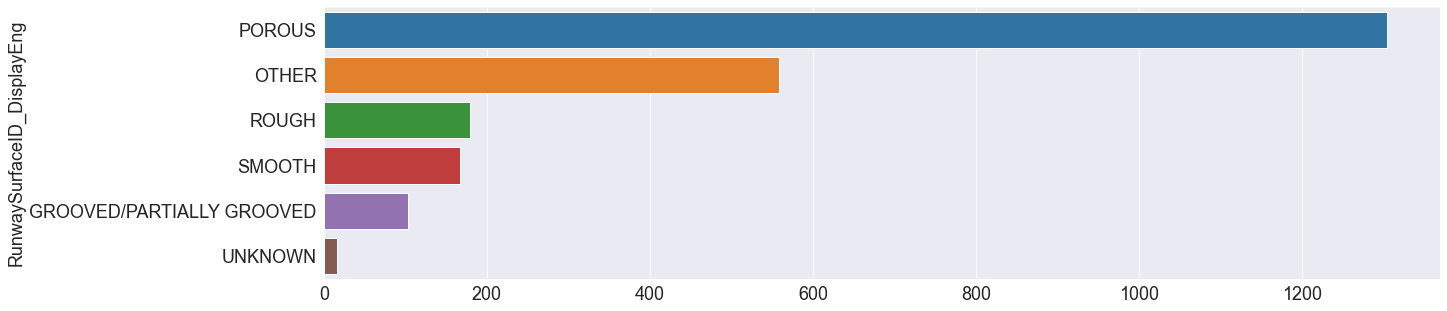

In [89]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'RunwaySurfaceID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

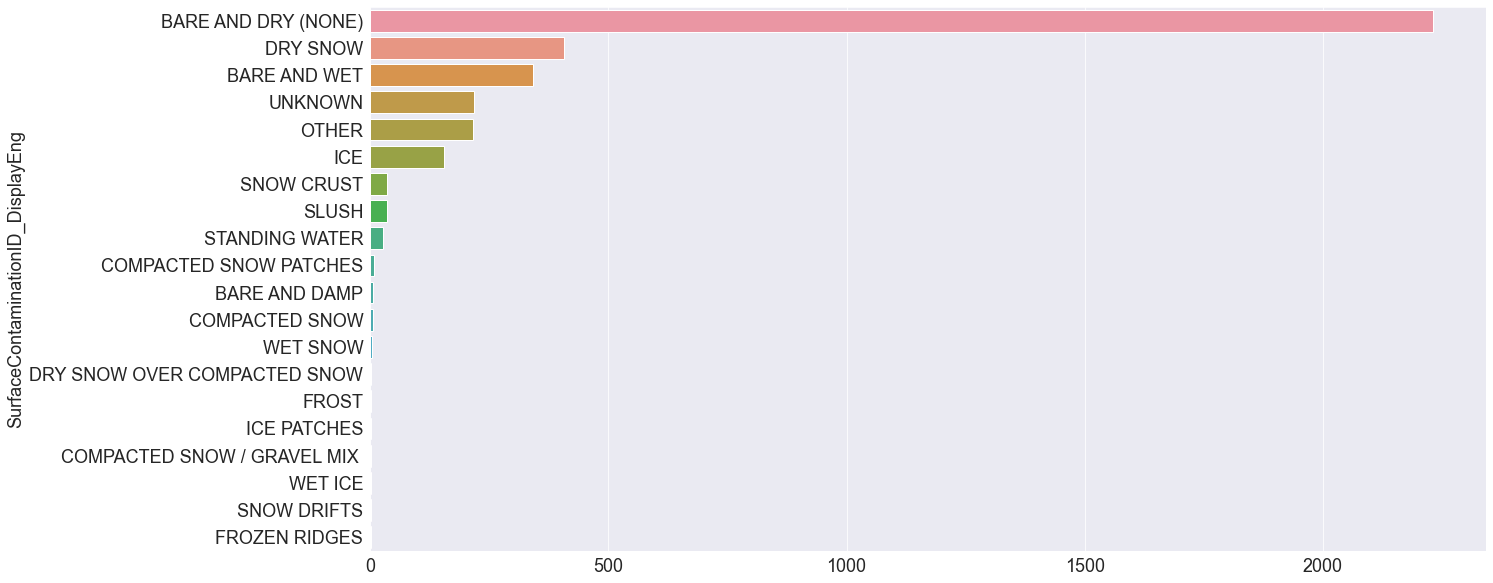

In [21]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'SurfaceContaminationID_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

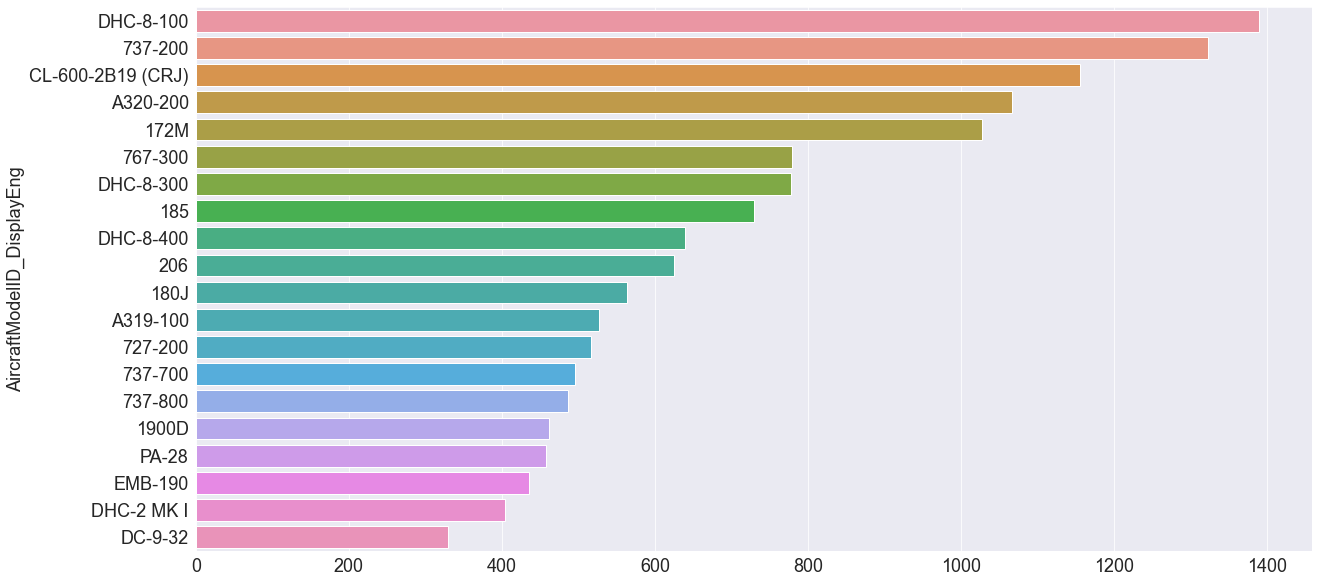

In [19]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftModelID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False).head(20)
fig = sns.barplot(graph.values, graph.index);

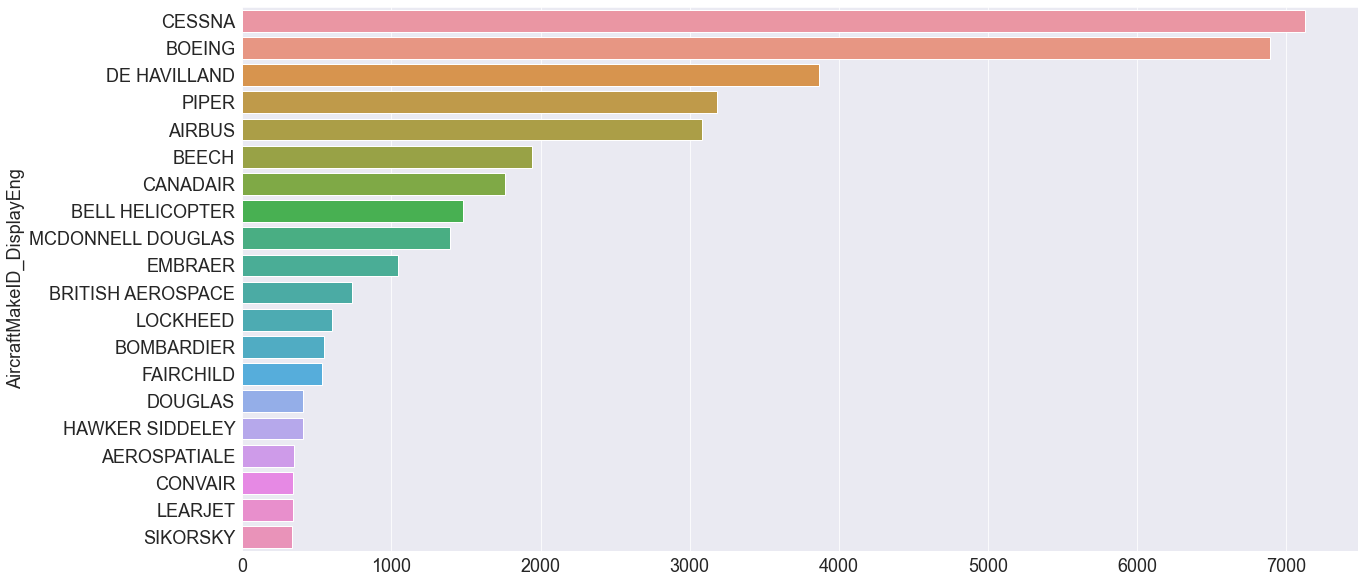

In [20]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftMakeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False).head(20)
fig = sns.barplot(graph.values, graph.index);

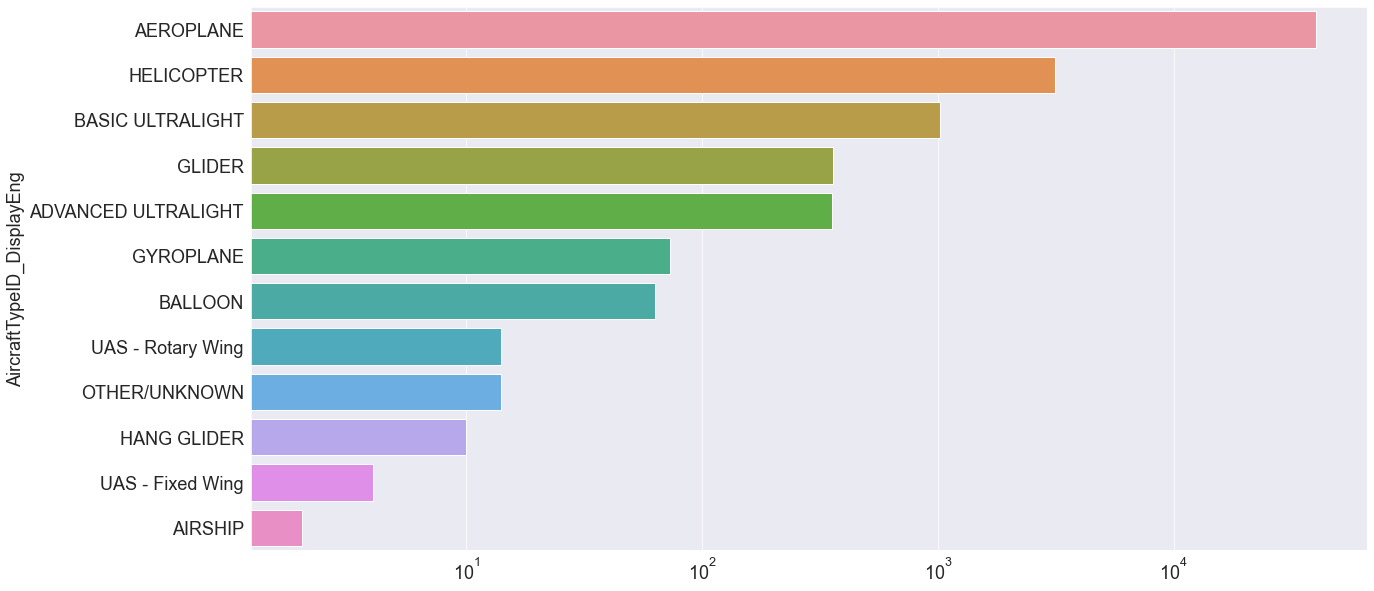

In [93]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale('log')

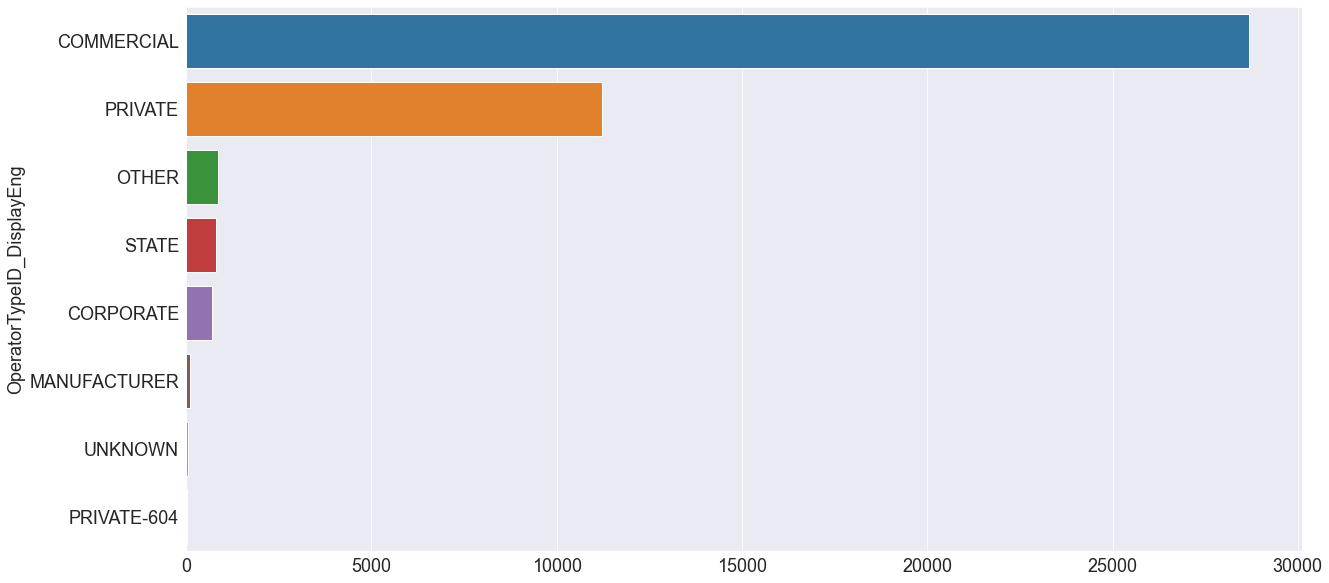

In [94]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OperatorTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

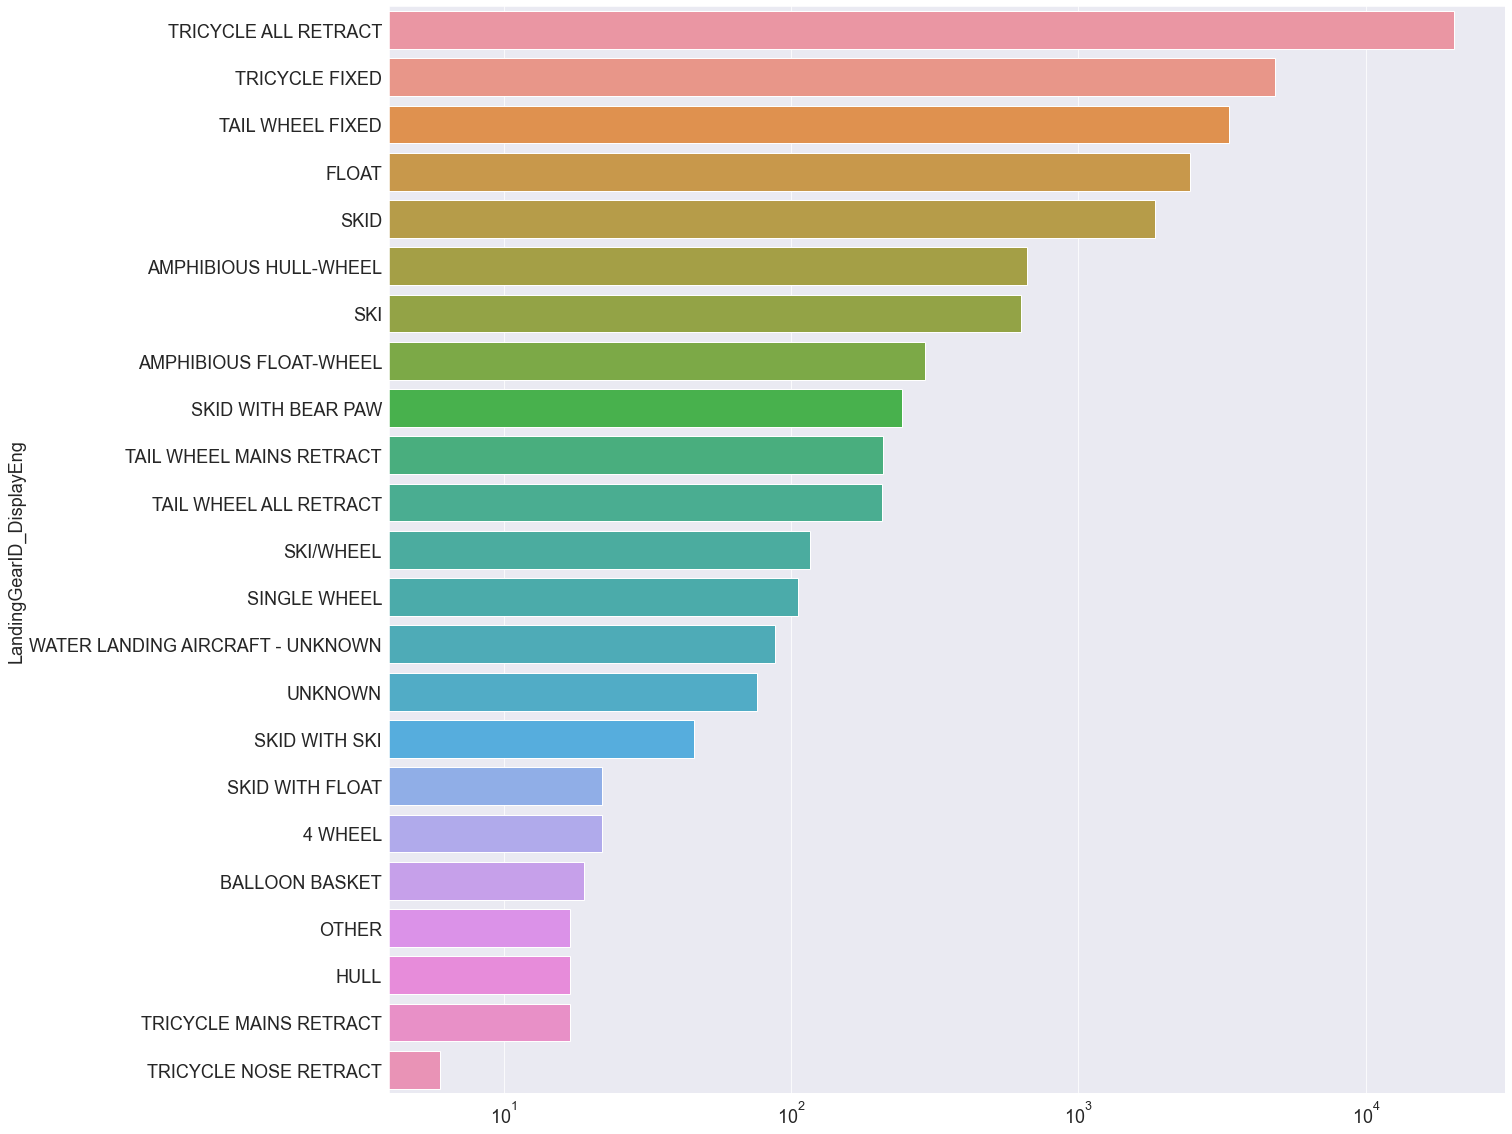

In [95]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'LandingGearID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

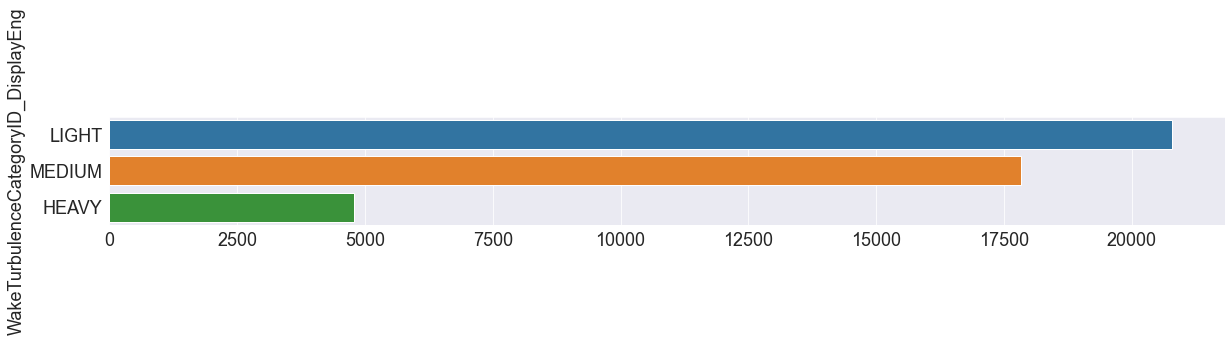

In [96]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'WakeTurbulenceCategoryID_DisplayEng'
graph =  aircraft_df[aircraft_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

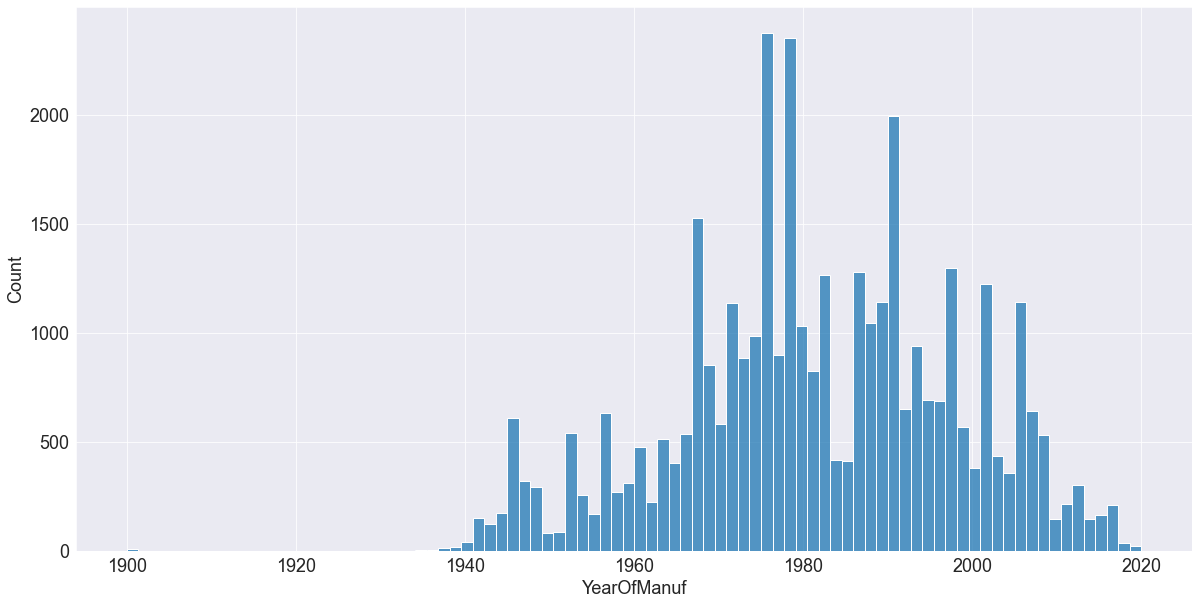

In [46]:
def clean_YoM(txt):
    txt = str(txt)
    if len(txt)==4 and txt[0]!=' ':
        return int(txt)
    elif len(txt)==6:
        return int(txt[:-2])

column = 'YearOfManuf'
aircraft_df[column] = aircraft_df[column].apply(clean_YoM)
matplotlib.rcParams['figure.figsize'] = (20, 10)
fig = sns.histplot(x=column, data = aircraft_df.dropna(subset=[column]));

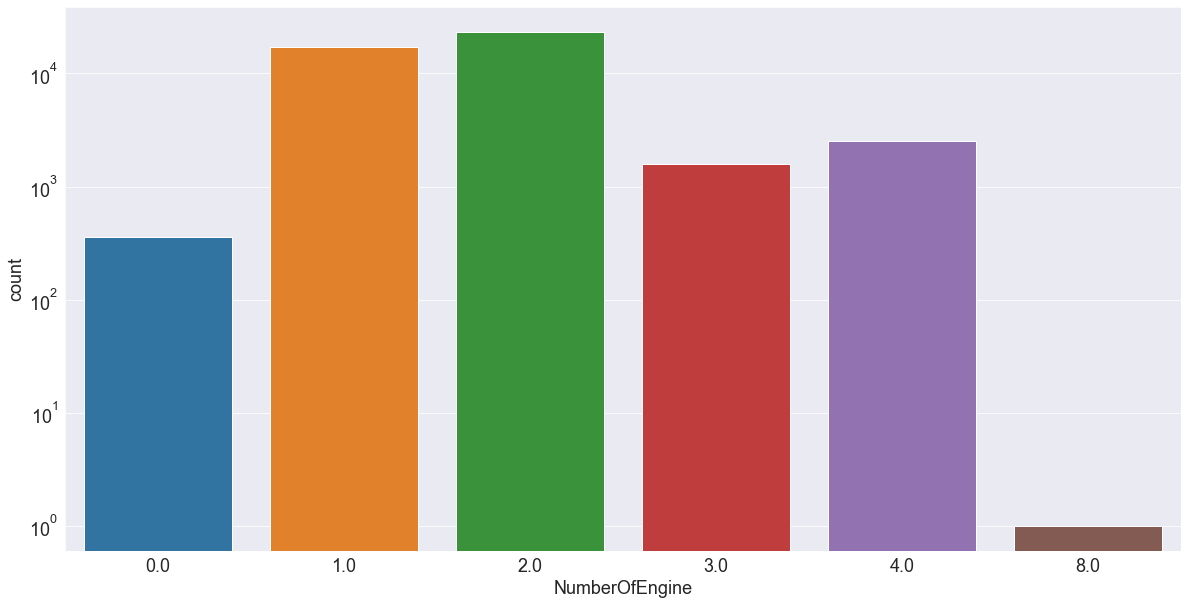

In [99]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'NumberOfEngine'
fig = sns.countplot(x=column, data = aircraft_df.dropna(subset=[column]));
fig.set_yscale("log");

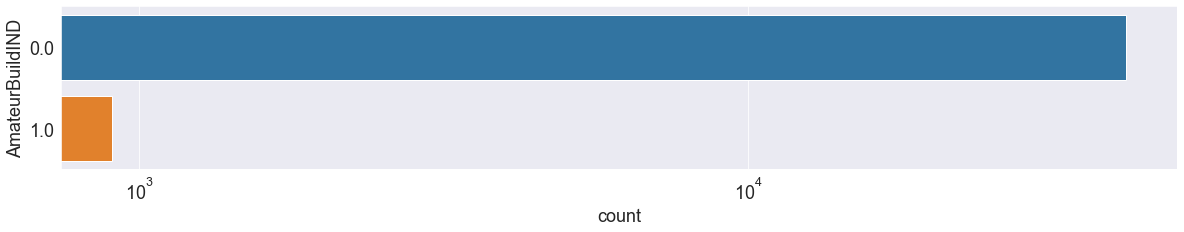

In [100]:
matplotlib.rcParams['figure.figsize'] = (20, 3)
column = 'AmateurBuildIND'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log");

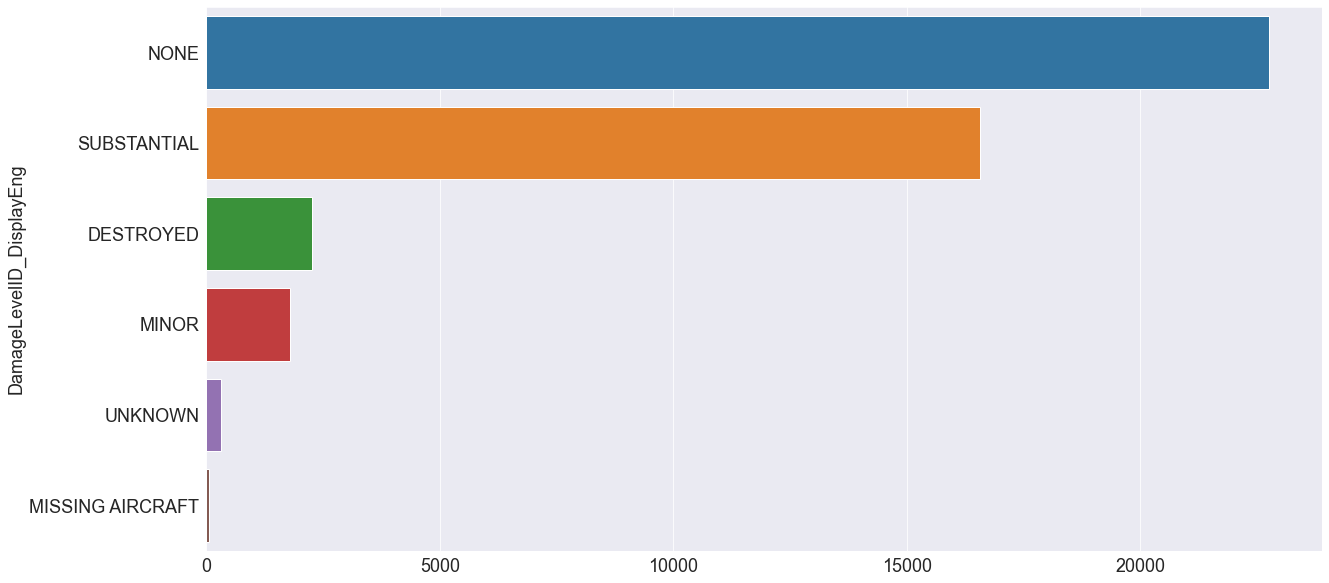

In [105]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'DamageLevelID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

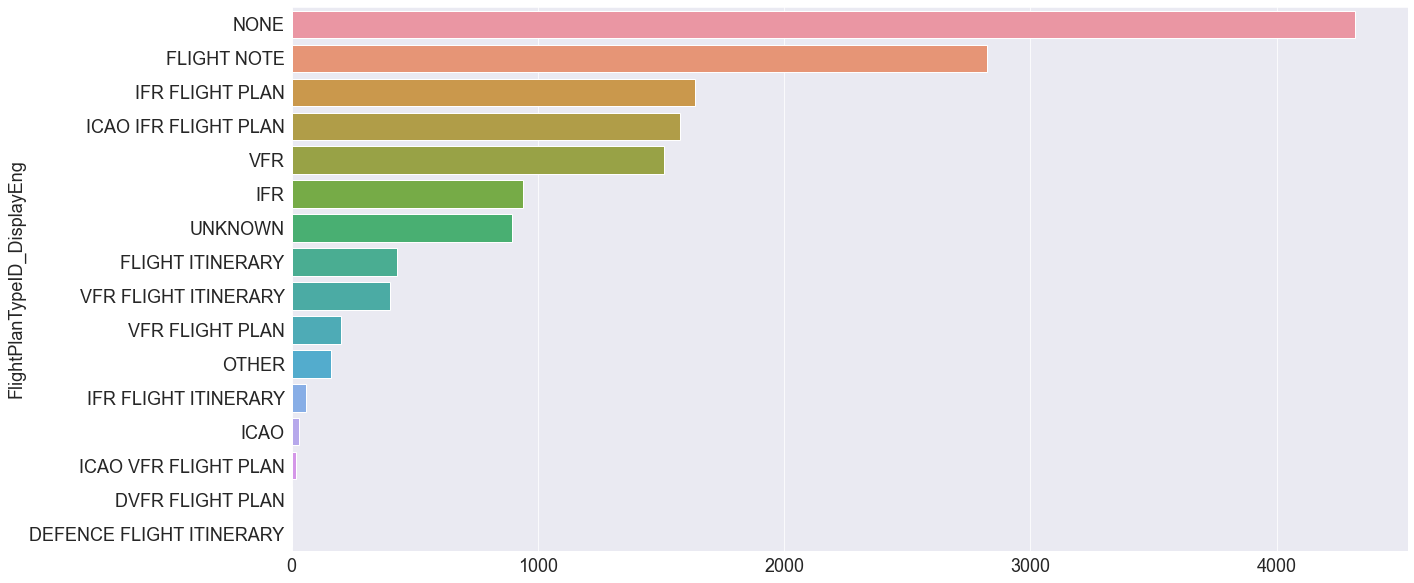

In [106]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'FlightPlanTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

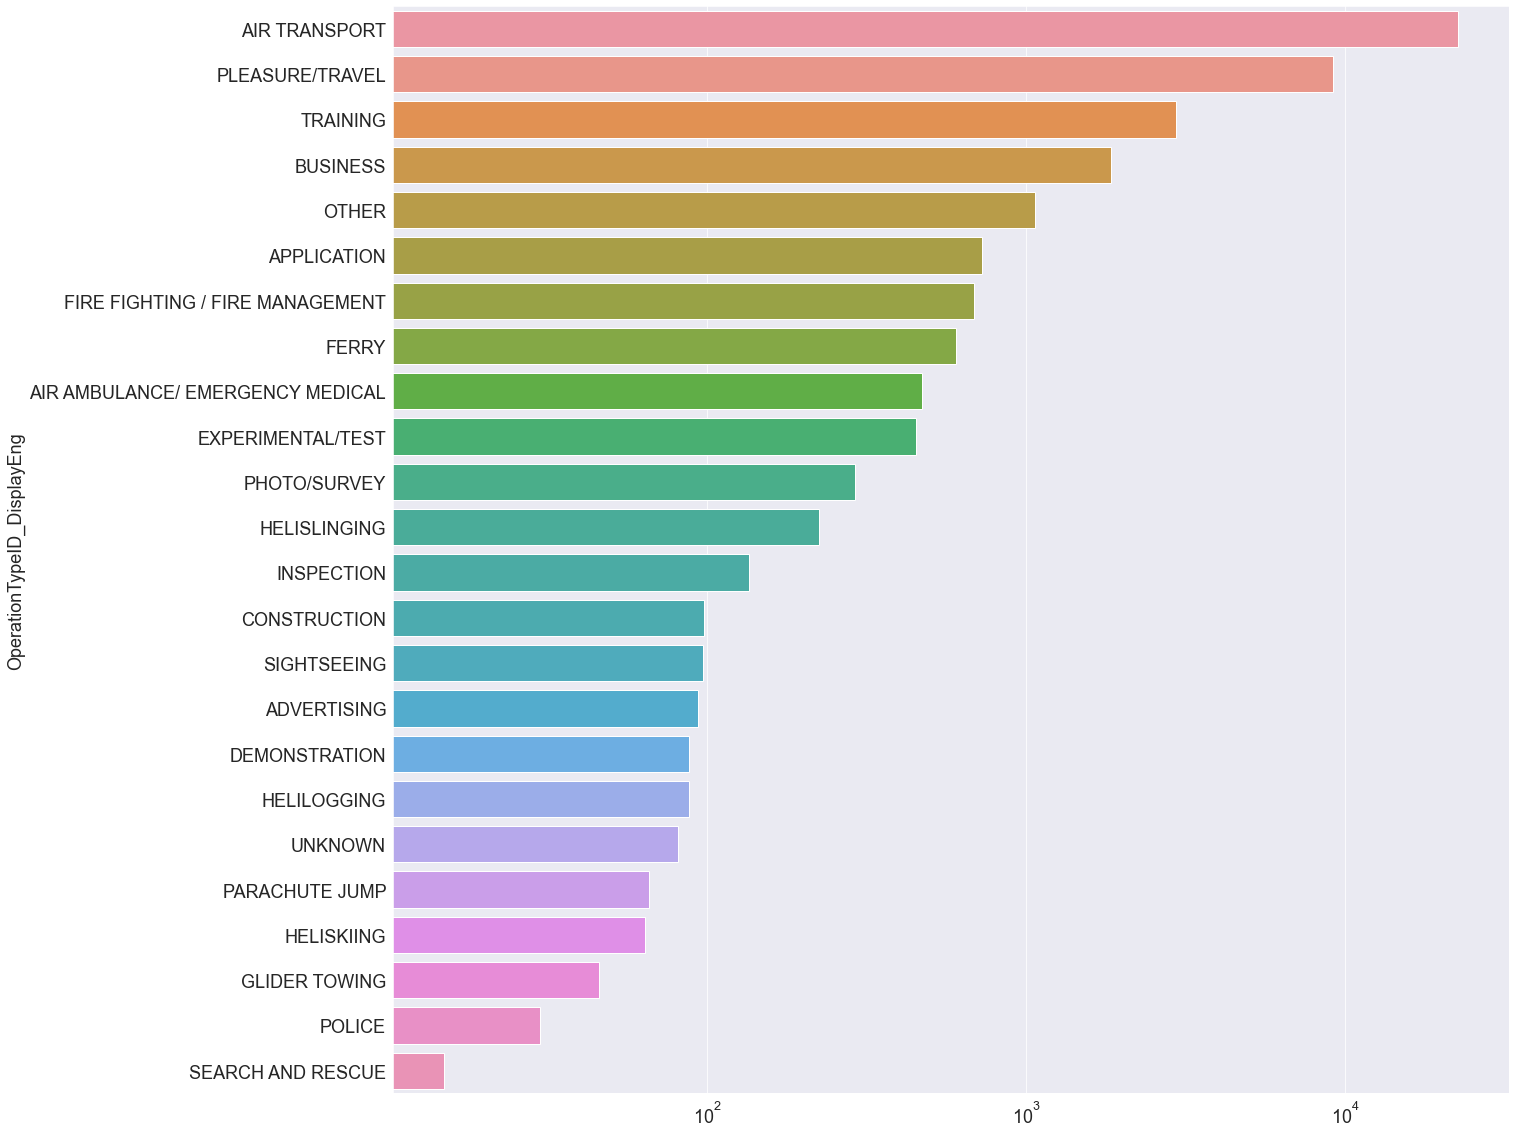

In [107]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'OperationTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

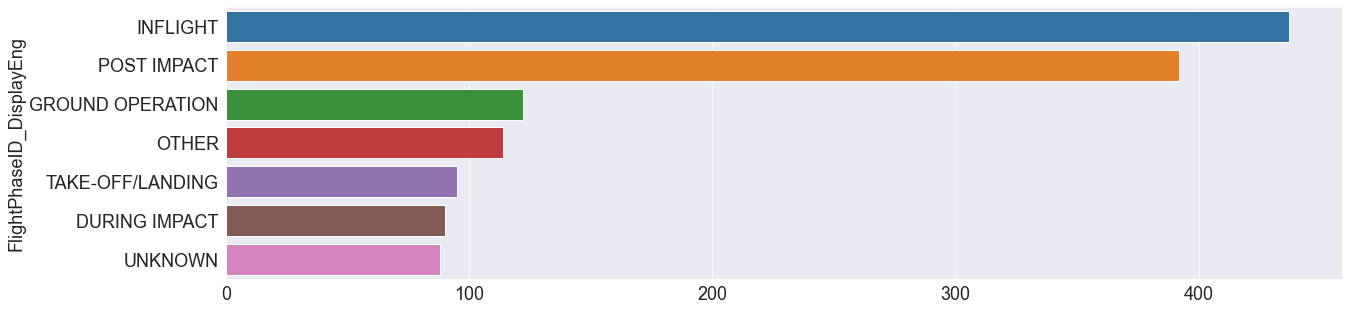

In [108]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'FlightPhaseID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

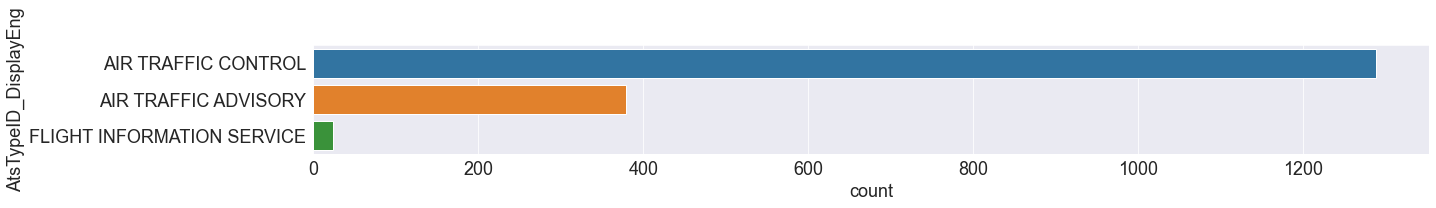

In [109]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'AtsTypeID_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

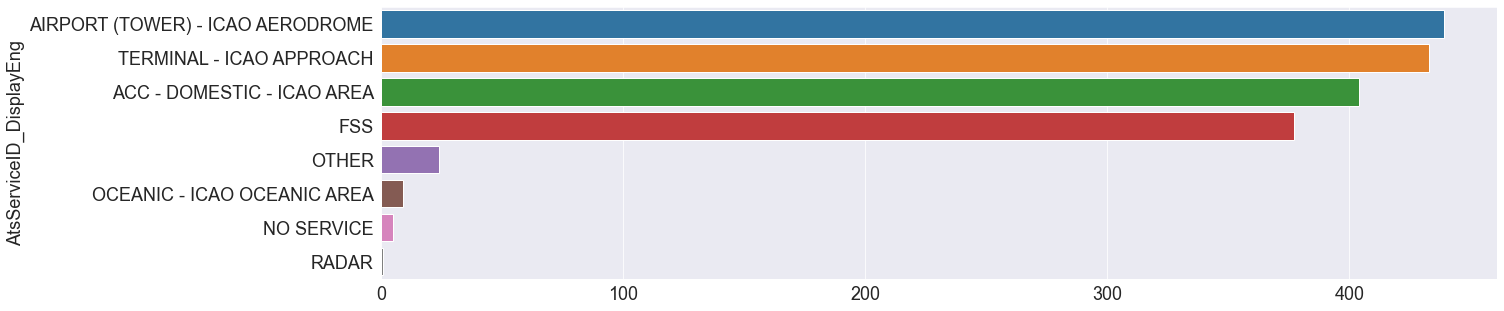

In [110]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AtsServiceID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

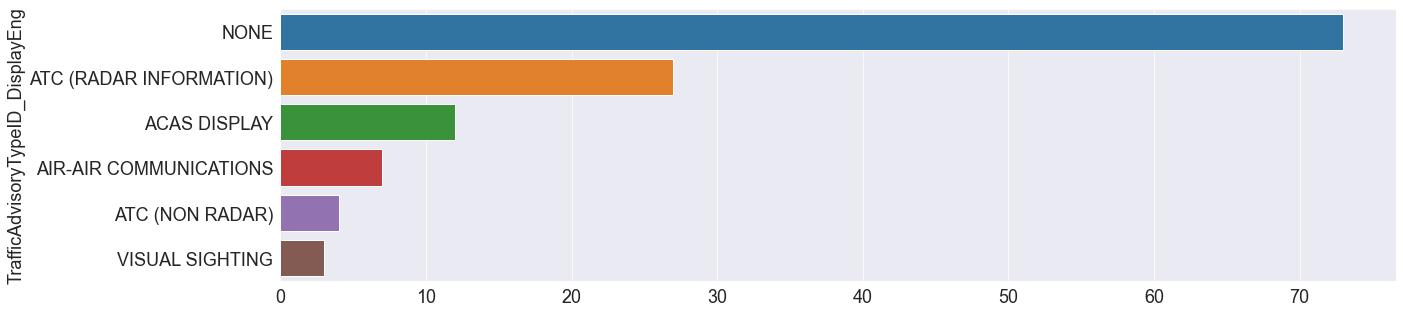

In [111]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'TrafficAdvisoryTypeID_DisplayEng'
graph =  aircraft_df[aircraft_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

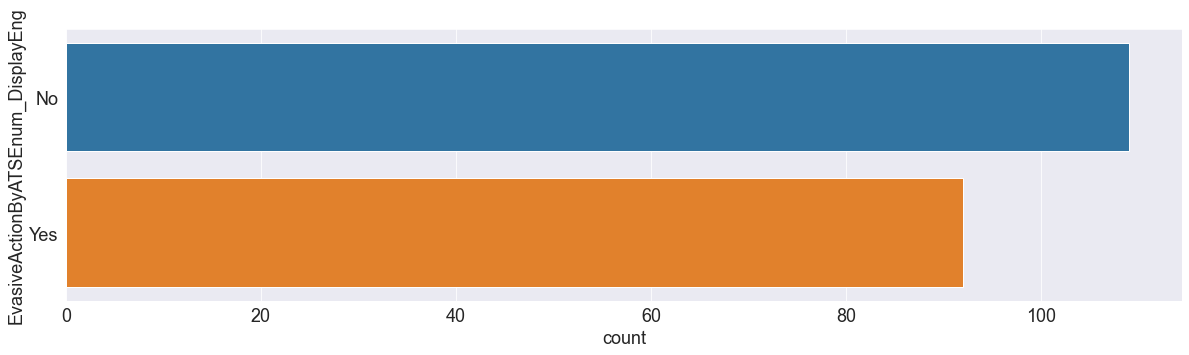

In [112]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvasiveActionByATSEnum_DisplayEng'
fig = sns.countplot(y=column ,data = aircraft_df[aircraft_df[column]!='Unknown'].dropna(subset=[column]));

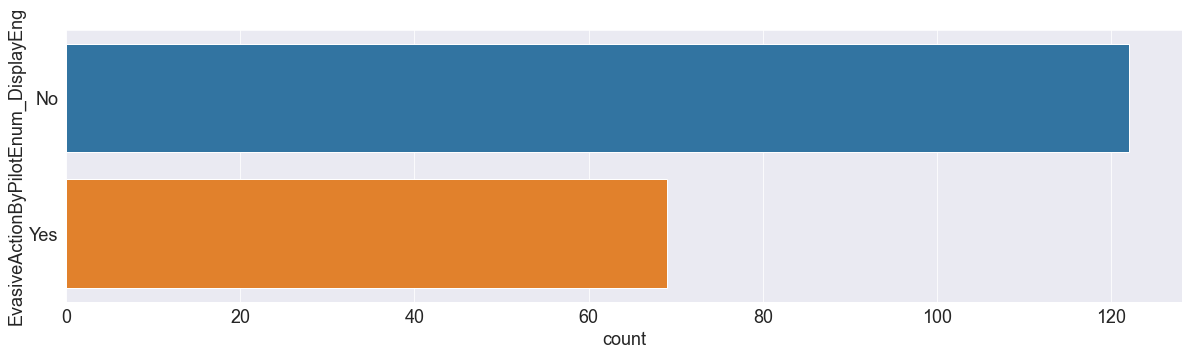

In [113]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvasiveActionByPilotEnum_DisplayEng'
fig = sns.countplot(y=column,data = aircraft_df[aircraft_df[column]!='Unknown'].dropna(subset=[column]));

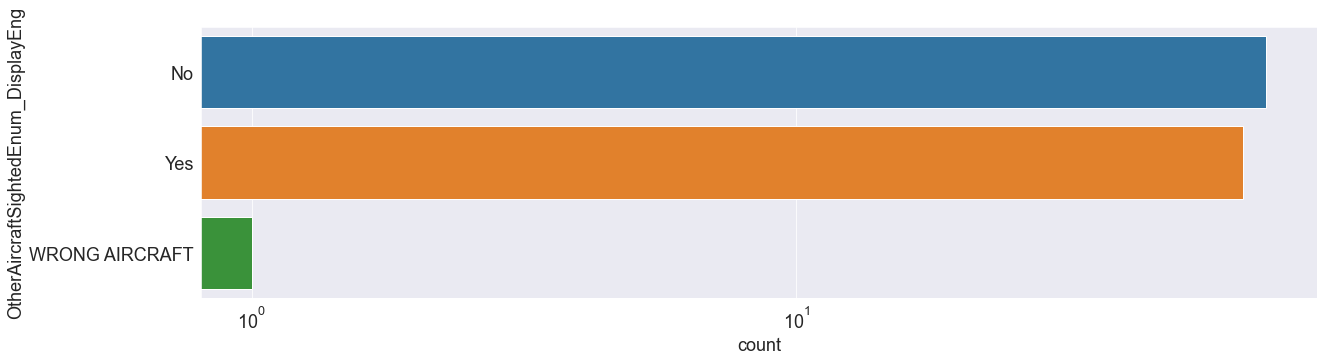

In [114]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OtherAircraftSightedEnum_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));
fig.set_xscale("log");

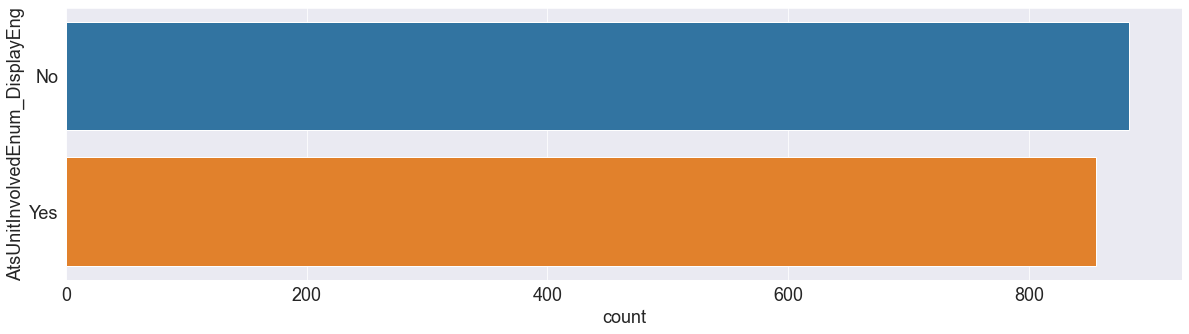

In [115]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AtsUnitInvolvedEnum_DisplayEng'
fig = sns.countplot(y=column, data = aircraft_df.dropna(subset=[column]));

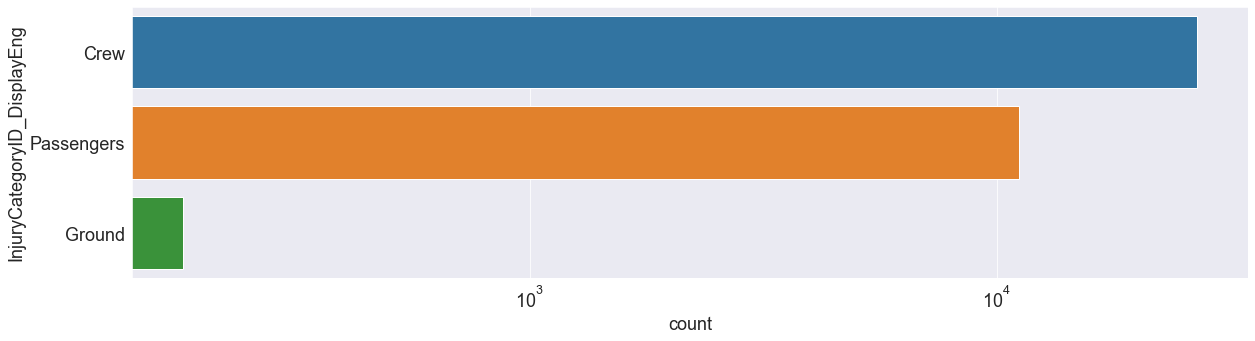

In [116]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'InjuryCategoryID_DisplayEng'
fig = sns.countplot(y=column, data = injuries_df.dropna(subset=[column]));
fig.set_xscale("log");

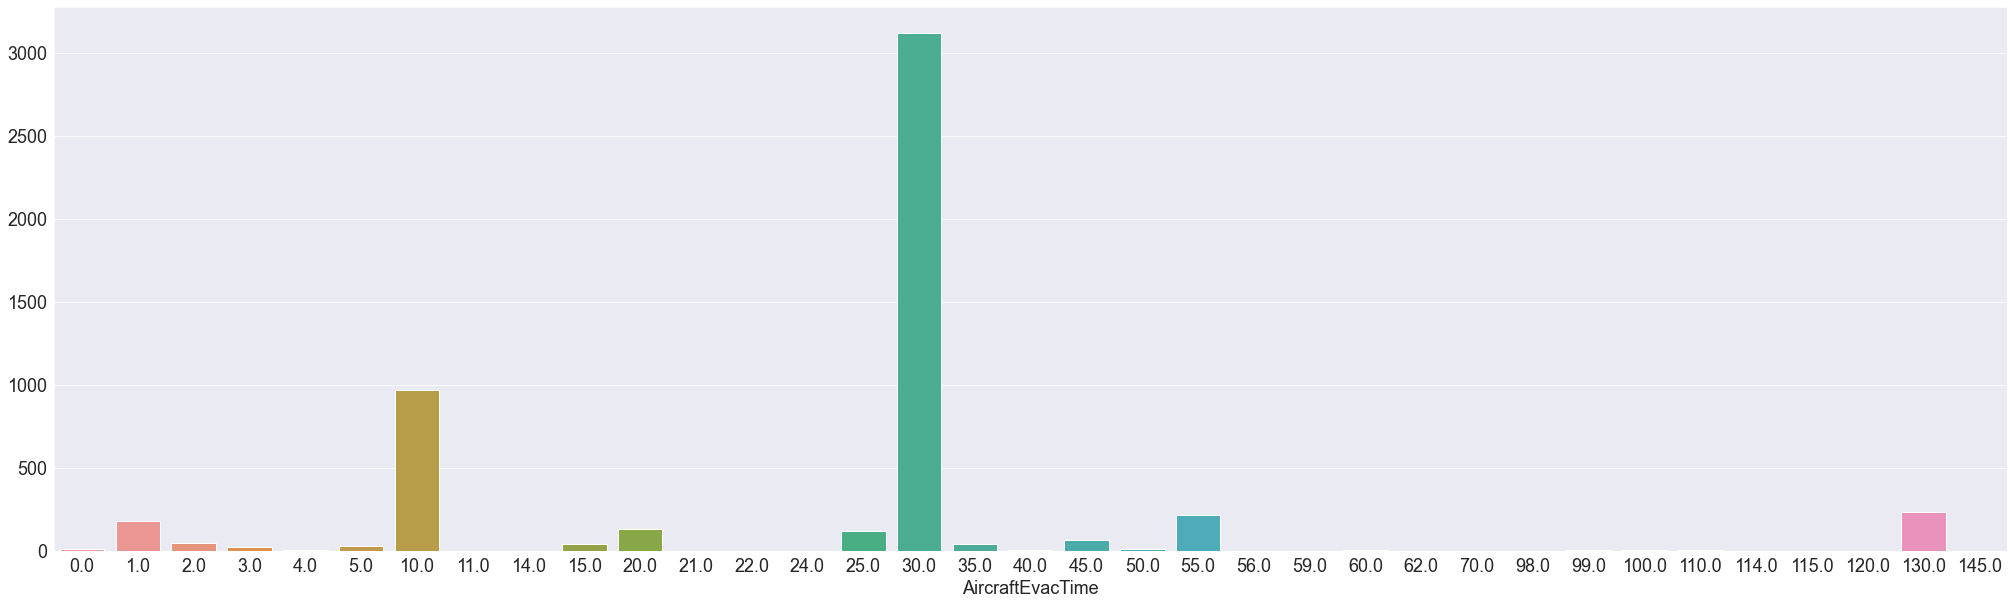

In [117]:
matplotlib.rcParams['figure.figsize'] = (35, 10)
column = 'AircraftEvacTime'
data = survivability_df[survivability_df[column]<150].groupby(column).OccNo.count()
sns.barplot(x = data.index, y = data.values);

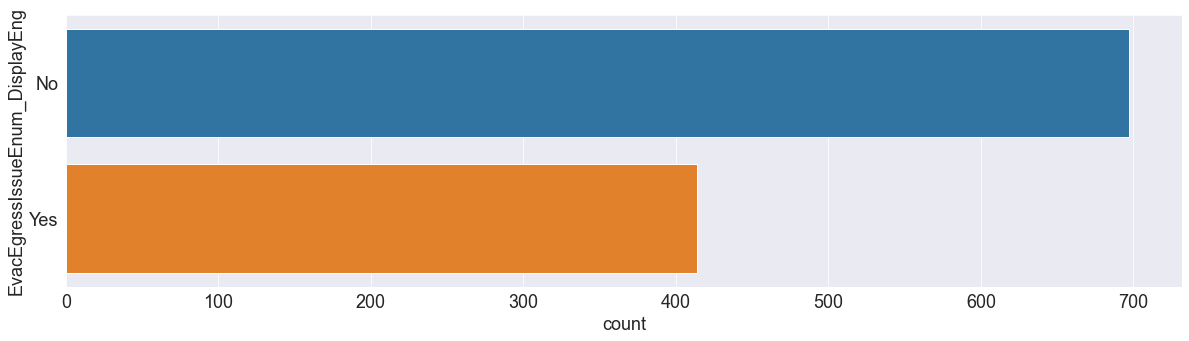

In [118]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EvacEgressIssueEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

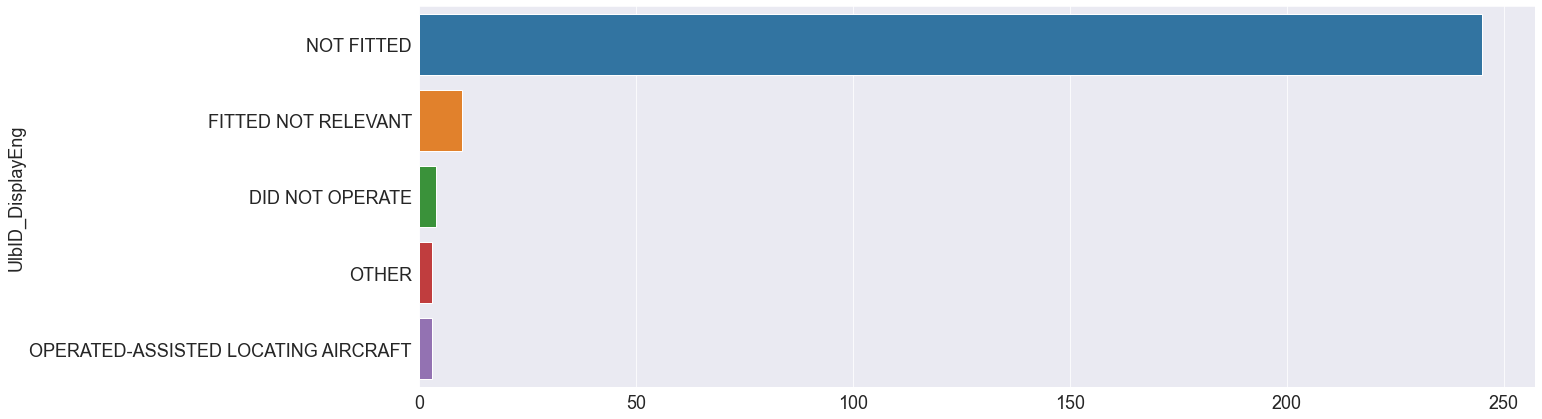

In [119]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'UlbID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

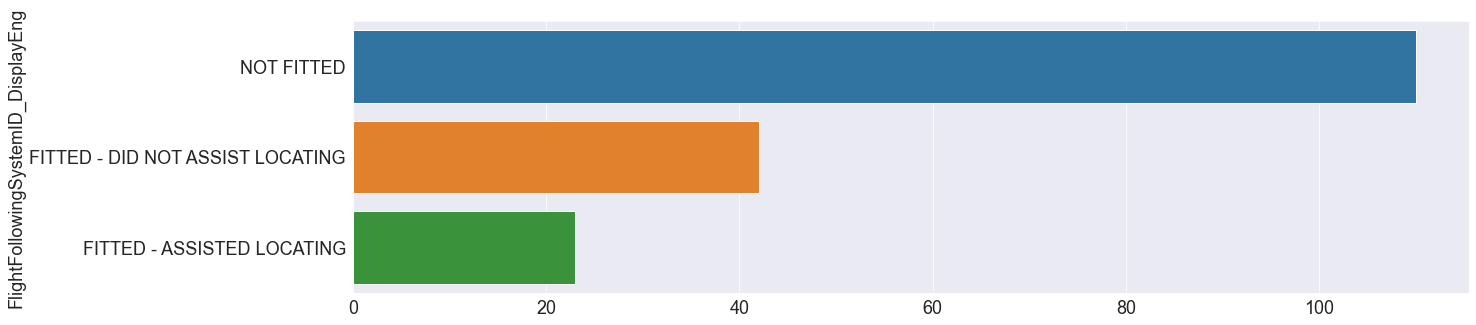

In [120]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'FlightFollowingSystemID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

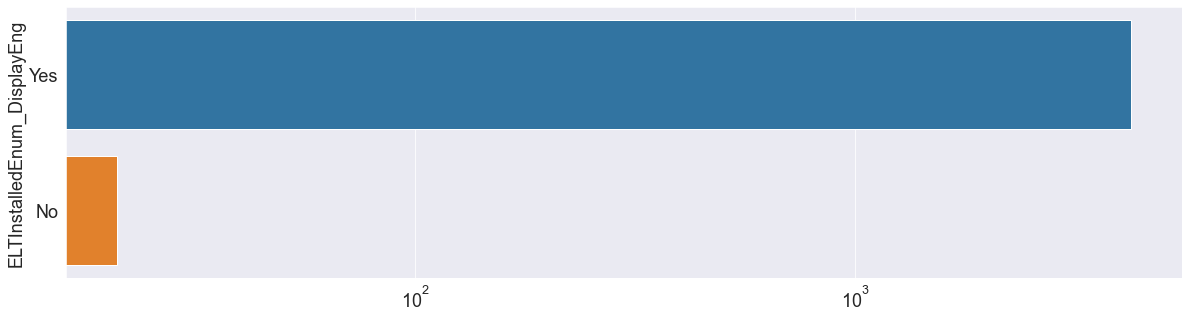

In [123]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTInstalledEnum_DisplayEng'
graph =  survivability_df[survivability_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

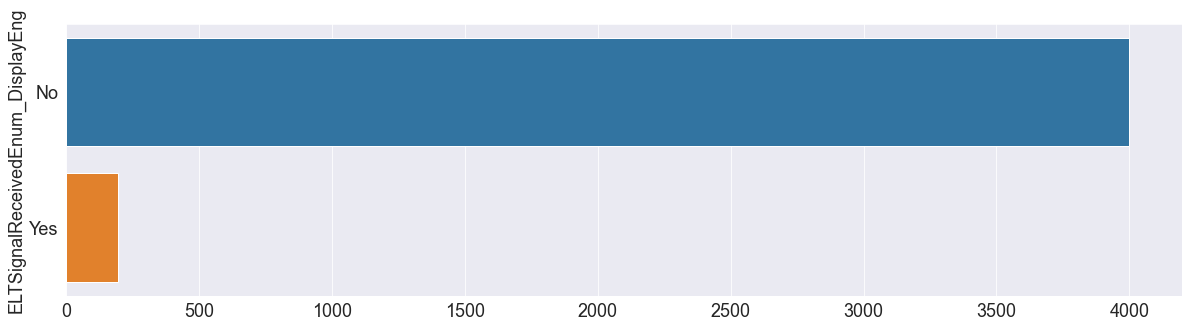

In [124]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTSignalReceivedEnum_DisplayEng'
graph =  survivability_df[survivability_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

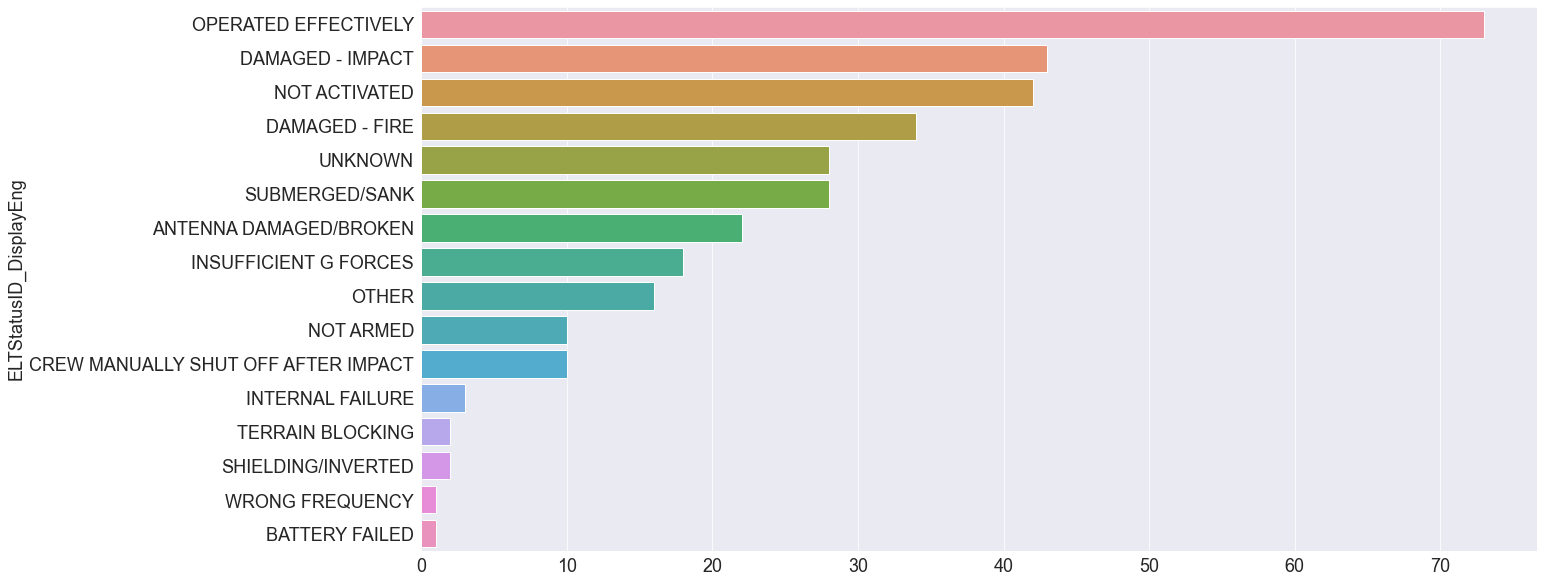

In [126]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'ELTStatusID_DisplayEng'
graph =  survivability_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

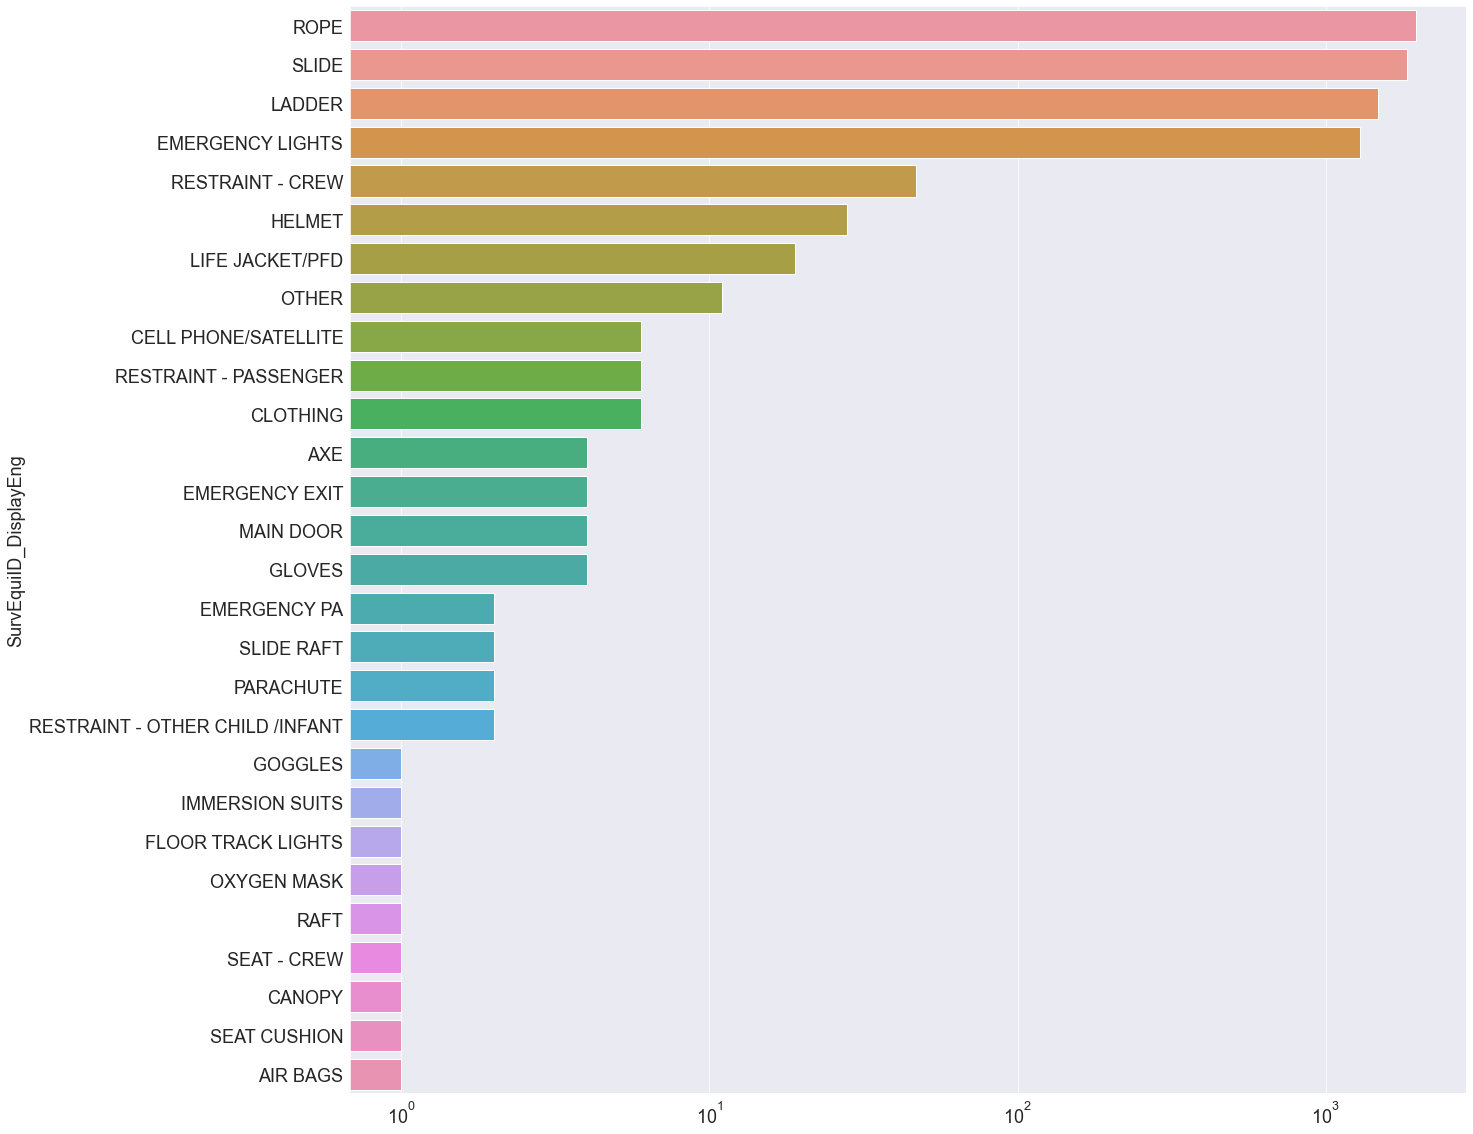

In [127]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'SurvEquiID_DisplayEng'
graph =  survivability_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

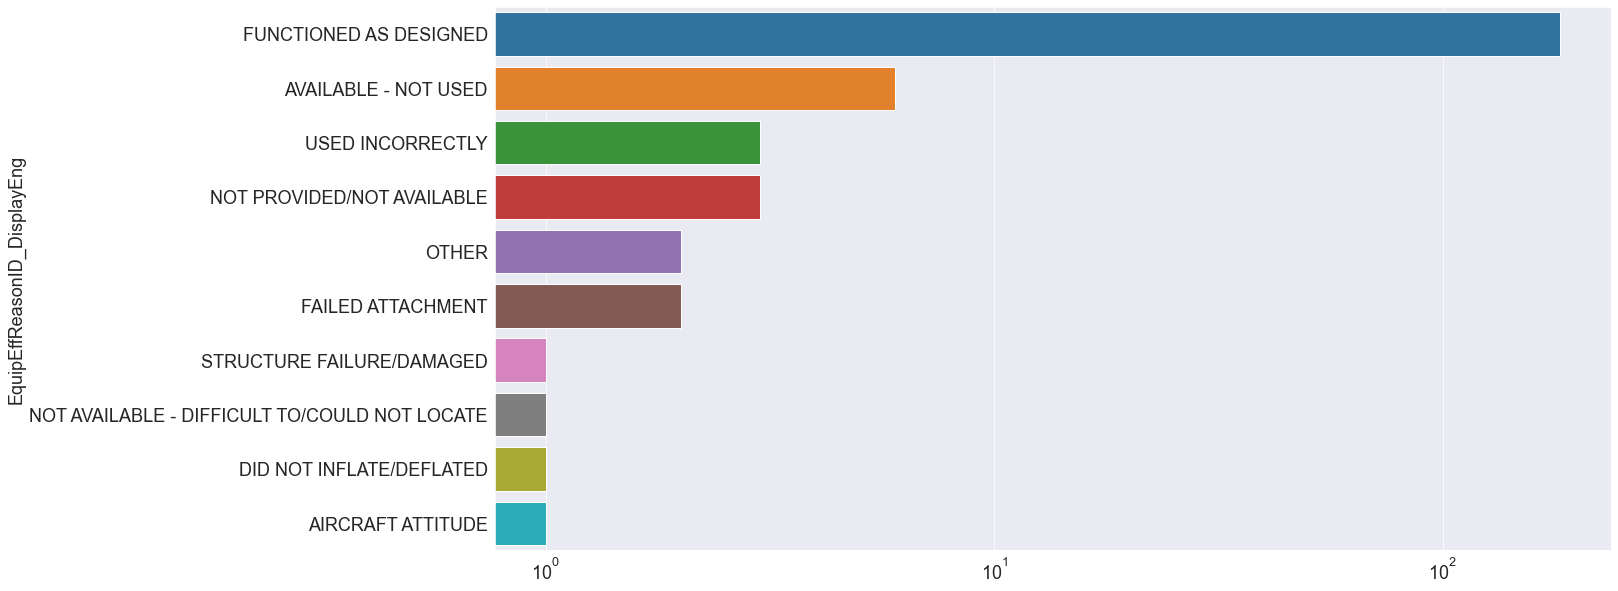

In [128]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EquipEffReasonID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

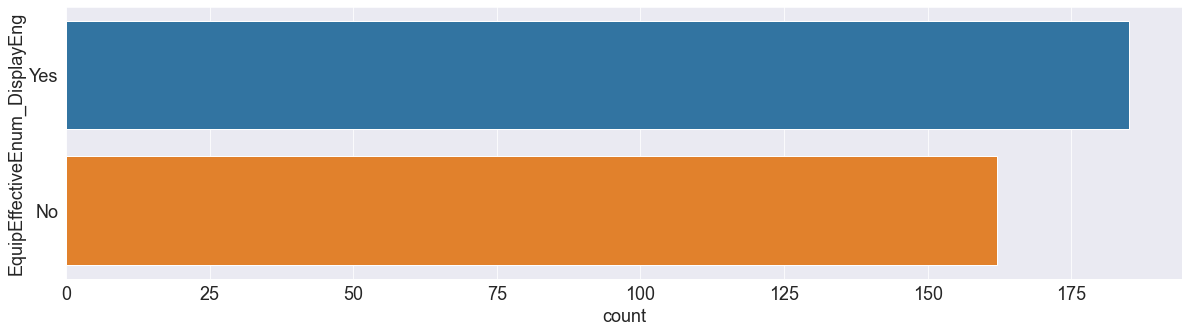

In [129]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipEffectiveEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

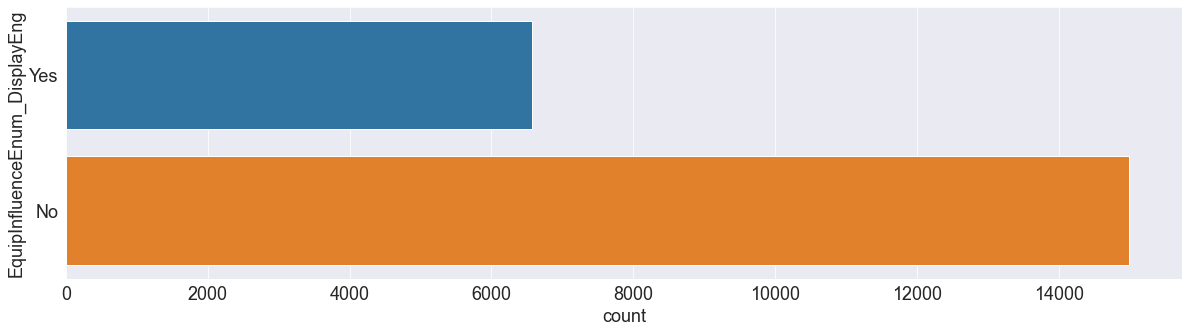

In [130]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipInfluenceEnum_DisplayEng'
survivability_df[column] = survivability_df.fillna({column:'No'})[column]
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

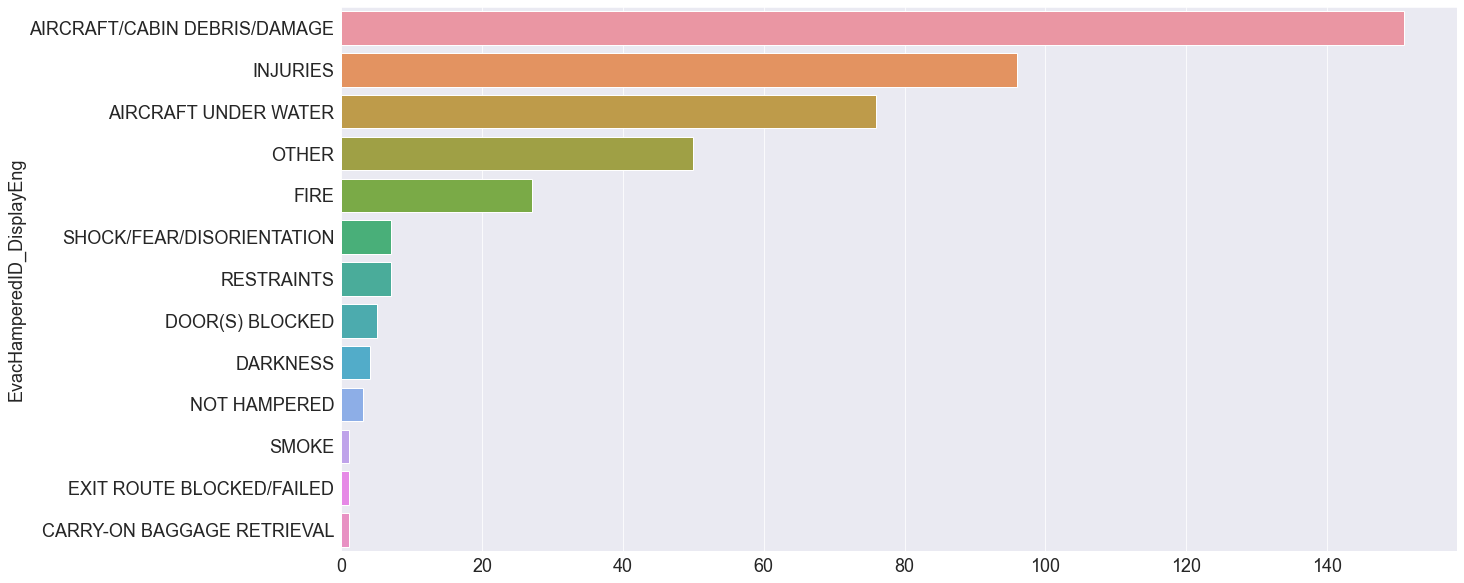

In [131]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EvacHamperedID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

## References
### Columns descriptions :  
 **EvacHamperedID_DisplayEng**  : The reason(s) why the evacuation was hampered, if applicable, in English. <br>
 **TimeZoneID_DisplayEng**  : The time zone used for reporting the time of occurrence, in English. <br>
 **FullPhaseDescEng**  : An algorithm-generated text string describing the phase in detail, in English. <br>
 **UlbID_DisplayEng**  : Indicates whether the underwater locator beacon was installed, operated, and/or relevant to the occurrence, in English. <br>
 **OtherAircraftSightedEnum_DisplayEng**  : Indicates whether the other aircraft was sighted by the specific aircraft involved (Yes/No/Wrong aircraft), in English. <br>
 **AircraftModelID_DisplayEng**  : The aircraft model, in English. <br>
 **SkyCondID_DisplayEng**  : The sky conditions at the time of the occurrence, in English. <br>
 **TakeOffLandingTypeID_DisplayEng**  : The type of takeoff and landing area associated with the occurrence, in English. <br>
 **OrganizationID_DisplayEng**  : The name of the organization (if the operator is an organization), in English. <br>
 **InjuriesEnum_DisplayEng**  : Indicates whether there were any injuries related to the occurrence, including ground injuries, in English. <br>
 **ELTSignalReceivedEnum_DisplayEng**  : Indicates whether an ELT signal was received, if known, in English. <br>
 **ELTStatusID_DisplayEng**  : A description of the ELT status, in English. <br>
 **SeriousIncidentEnum_DisplayEng**  : Indicates whether the occurrence was a serious incident as defined by ICAO in Annex 13, in English. Indicator: Yes/No. <br>
 **InjuryCategoryID_DisplayEng**  : A description of the injury category (crew/passengers/ground), in English.
Note: Injury count for crew/passengers/ground are stored in separate entries. <br>
 **VisibilyCeiling**  : The visibility ceiling, in feet. <br>
 **FlightPhaseID_DisplayEng**  : The flight phase when fire or smoke is initiated, in English. <br>
 **Unknown_MissingCount**  : The number of people who are missing or whose location is unknown for the associated occurrence/occurrence aircraft. <br>
 **ICAO_DisplayEng**  : The International Civil Aviation Organization (ICAO) occurrence category, in English.
For one occurrence, multiple ICAO categories may be assigned, that will generate multiple entries/rows. <br>
 **AircraftMakeID_DisplayEng**  : The aircraft make, in English. <br>
 **AircraftTypeID_DisplayEng**  : The aircraft type as defined in the Canadian Aviation Regulations, Part 1, Subpart 1. <br>
 **EvasiveActionByATSEnum_DisplayEng**  : Indicates whether evasive action was instructed by the air traffic service (ATS), if known, in English. <br>
 **OccTime**  : The time the occurrence happened. Time format is hh:mm (24-hour clock). <br>
 **FlightPlanTypeID_DisplayEng**  : The type of flight plan, in English. <br>
 **SurvEquiID_DisplayEng**  : The survival equipment available on the occurrence aircraft, if relevant, in English.
Equipment grid - Multiple survival equipments can be assigned to an occurrence (OccID). Each equipment will result in a separate entry. <br>
 **OccTypeID_DisplayEng**  : A description of the occurrence type (accident/incident reportable), in English. <br>
 **RegistrationNo**  : The registration number of the occurrence aircraft. <br>
 **OccDate**  : The occurrence date. Date format is YYYY-MM-DD. <br>
 **TotalSeriousCount**  : The total number of serious injuries (includes any ground injuries). <br>
 **WeatherPhenomenaTypeID_DisplayEng**  : The type of weather phenomena at the time of the occurrence, in English.
Weather phenomena grid - Multiple weather phenomenas can be specified for each occurrence (OccID), each type and its associated description will appear as a separate entry. <br>
 **EvacEgressIssueEnum_DisplayEng**  : Indicates whether there were evacuation egress issues, if known, in English. <br>
 **DepartAirportID_AirportName**  : The name of the departure airport, if applicable. <br>
 **Latitude**  : Latitude of the occurrence or airport location <br>
 **TotalNoneCount**  : The total number of people not injured (aircraft occupants only). <br>
 **ICAO**  : The International Civil Aviation Organization (ICAO) 4-letter airport code. <br>
 **InflightIcingCondEnum_DisplayEng**  : Indicates whether in-flight icing conditions existed, if known, in English. <br>
 **FlightNo**  : Flight Number of the Specific Aircraft Involved (AcID) <br>
 **AirportID_CountryID_DisplayEng**  : The country in which the airport is located, in English. <br>
 **DamageLevelID_DisplayEng**  : The aircraft level of damage as defined by ICAO, in English. <br>
 **SurvivableEnum_DisplayEng**  : Indicates whether the occurrence was survivable (for occurrences involving an impact), in English. Indicator: Yes/No/Unknown. <br>
 **AmateurBuildIND**  : Indicates whether the aircraft was amateur-built. <br>
 **DestAirportID_AirportName**  : The name of the destination airport, if applicable.  <br>
 **WakeTurbulenceCategoryID_DisplayEng**  : The wake turbulence category of the occurrence aircraft, as defined by the Canadian Aviation Regulations, Standard 821 -Canadian Domestic Air Traffic Control Separation, in English. <br>
 **LightCondID_DisplayEng**  : A description of the light conditions, in English. <br>
 **EvasiveActionByPilotEnum_DisplayEng**  : Indicates whether evasive action was taken by the pilot, if known, in English. <br>
 **PhaseID_DisplayEng**  : The phase of the flight, in English.
Note: Multiple phases can be assigned to each occurrence (OccID) or specific aircraft (AcID) and each will have an associated EventID. <br>
 **OccNo**  : The unique occurrence number for general reference. <br>
 **RunwaySurfaceID_DisplayEng**  : The texture of the surface of the runway involved in the occurrence, in English. <br>
 **ICAODepart**  : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended takeoff. <br>
 **OccRegionID_DisplayEng**  : The region of the occurrence, as defined by the geographical area each regional office has been assigned, in English. <br>
 **FlightFollowingSystemID_DisplayEng**  : Indicates whether a flight following system (a type of onboard aircraft position tracking system) was installed, and whether it provided any assistance to locating the aircraft (English) <br>
 **AircraftEvacTime**  : The duration of the aircraft evacuation, in minutes. <br>
 **TotalFatalCount**  : The total number of fatalities (includes any ground fatalities). <br>
 **CountryID_DisplayEng**  : The country of the occurrence, in English. <br>
 **OccIncidentTypeID_DisplayEng**  : If the occurrence is a reportable incident, the type of incident as defined in the Transportation Safety Board Regulations, Part 1, Subparagraph 2(1)(b), in English. <br>
 **OperatorTypeID_DisplayEng**  : The type of operator (private, commercial, state) involved in the occurrence, in English. <br>
 **SeriousCount**  : The number of serious injuries associated to the occurrence or occurrence aircraft. <br>
 **EquipEffReasonID_DisplayEng**  : The reason for survival equipment effectiveness, in English. <br>
 **ELTInstalledEnum_DisplayEng**  : Indicates whether an emergency locator transmitter (ELT) was installed on the occurrence aircraft, if known, in English. <br>
 **EquipEffectiveEnum_DisplayEng**  : Indicates whether equipment was effective and corresponds to the survival equipment, if known, in English. <br>
 **SurfaceContaminationID_DisplayEng**  : The type of surface contamination, if relevant, in English.
Note: Each description will result in a separate entry. <br>
 **AtsServiceID_DisplayEng**  : The air traffic service (ATS) provided in Canada or by an international equivalent, in English. <br>
 **YearOfManuf**  : The year in which the aircraft was manufactured. <br>
 **AirportID_ProvinceID_DisplayEng**  : The province or the state in which the airport is located, in Canada or the United States respectively, in English.  <br>
 **TotalMinorCount**  : The total number of minor injuries (includes any ground injuries). <br>
 **WeightWithinLimitsEnum_DisplayEng**  : Indicates whether the actual aircraft weight was within limits at the time of the occurrence, in English. Indicator: Yes/No/Unknown <br>
 **ICAODestination**  : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended landing. <br>
 **MinorCount**  : The number of minor injuries for associated occurrence/occurrence aircraft. <br>
 **ReportedByID_DisplayEng**  : The name of the organization or entity that reported the occurrence, in English. <br>
 **Temperature**  : The temperature at the time of the occurrence, in degrees Celsius by default. <br>
 **FullEventDescEng**  : An algorithm-generated text string describing the full event, in English. <br>
 **DangerousGoodEnum_DisplayEng**  : Indicates whether there were dangerous goods on board the occurrence aircraft, if known, in English. <br>
 **AtsUnitName**  : The air traffic service (ATS) unit name. <br>
 **TrafficAdvisoryTypeID_DisplayEng**  : The type of traffic advisory issued at the time of the occurrence, in English. <br>
 **GeneralWeatherID_DisplayEng**  : Indicates whether the known weather conditions were conducive to visual or instrument flight rules, in English. <br>
 **AtsUnitInvolvedEnum_DisplayEng**  : Indicates whether an air traffic service (ATS) unit was involved, in English. <br>
 **LandingGearID_DisplayEng**  : The type of landing gear on the aircraft, in English. <br>
 **AtsTypeID_DisplayEng**  : The air traffic service (ATS) type description, in English. <br>
 **Visibility**  : The visibility, in statute miles. <br>
 **OperationTypeID_DisplayEng**  : The type of operation performed at the time of the occurrence, in English. <br>
 **NumberOfEngine**  : The number of engines installed on the aircraft. <br>
 **TotalUnknownCount**  : The total number of people whose status is unknown (aircraft occupants only). <br>
 **NoneCount**  : The number of non injuries for the associated occurrence/occurrence aircraft. <br>
 **Location**  : The location of the occurrence <br>
 **FatalCount**  : The number of fatalities for the associated occurrence/occurrence aircraft. <br>
 **Longitude**  : Longitude of the occurrence or airport location <br>
 **RegCountryID_DisplayEng**  : The country of registration of the occurrence aircraft, in English. <br>
 **EventID_DisplayEng**  : A description of the event, in English. <br>
 **EquipInfluenceEnum_DisplayEng**  : Indicates whether the equipment influenced the survivability of the occurrence, if known, in English.